In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1. Descriptive statistics

# 3.2.	Confidence interval

In [2]:
sdf = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TII03/CSV/1.0/en')

In [3]:
sdf.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [4]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
sdf_col_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784','UNIT']
sdf.drop(sdf_col_drop ,axis=1, inplace=True) 

In [5]:
sdfa = sdf[(sdf['Luas Line'] != 'All Luas lines')]

In [6]:
# Renaming the columns
sdfa = sdfa.rename(columns={'Luas Line': 'Luas_Line'})

In [7]:
sdfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 1 to 767
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       512 non-null    object 
 1   Luas_Line  512 non-null    object 
 2   VALUE      506 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.0+ KB


In [8]:
# Display the rows with null values
sdfa_NaN = sdfa[sdfa.isnull().any(axis=1)]
print("Rows with null values:")
sdfa_NaN

Rows with null values:


,Week,Luas_Line,VALUE
157,2019 Week 53,Red line,NaN
158,2019 Week 53,Green line,NaN
475,2021 Week 53,Red line,NaN
476,2021 Week 53,Green line,NaN
634,2022 Week 53,Red line,NaN
635,2022 Week 53,Green line,NaN


We'll drop *'2020 Week 53'* to balance the years

In [9]:
#Dropping NaN
sdfa = sdfa.dropna(subset=['VALUE'])

In [10]:
#  Dropping '2020 Week 53' 
sdfa = sdfa[~sdfa['Week'].str.contains('Week 53')]


In [11]:
sdfa.head()

,Week,Luas_Line,VALUE
1,2019 Week 01,Red line,274139.0
2,2019 Week 01,Green line,275394.0
4,2019 Week 02,Red line,408199.0
5,2019 Week 02,Green line,430823.0
7,2019 Week 03,Red line,376785.0


In [12]:
# Extracting the year from Week column
sdfa['Year'] = pd.to_datetime(sdfa['Week'].str[:4] + ' ' + sdfa['Week'].str[-2:] + ' 1', format='%Y %W %w').dt.year

In [13]:
sdfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 1 to 767
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       504 non-null    object 
 1   Luas_Line  504 non-null    object 
 2   VALUE      504 non-null    float64
 3   Year       504 non-null    int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 17.7+ KB


In [14]:
sdfa.head()

,Week,Luas_Line,VALUE,Year
1,2019 Week 01,Red line,274139.0,2019
2,2019 Week 01,Green line,275394.0,2019
4,2019 Week 02,Red line,408199.0,2019
5,2019 Week 02,Green line,430823.0,2019
7,2019 Week 03,Red line,376785.0,2019


In [15]:
def count_occurrences_by_year(dataframe):
  
    year_counts = dataframe['Year'].value_counts().sort_index()

    return year_counts
result = count_occurrences_by_year(sdfa)
result

Year
2019    104
2020    104
2021    104
2022    104
2023     88
Name: count, dtype: int64

In [16]:
sdfa_2019 = sdfa[(sdfa['Year'] == 2019)].copy()
sdfa_2019.reset_index(drop=True, inplace=True)
sdfa_2020 = sdfa[(sdfa['Year'] == 2020)].copy()
sdfa_2020.reset_index(drop=True, inplace=True)
sdfa_2021 = sdfa[(sdfa['Year'] == 2021)].copy()
sdfa_2021.reset_index(drop=True, inplace=True)
sdfa_2022 = sdfa[(sdfa['Year'] == 2022)].copy()
sdfa_2022.reset_index(drop=True, inplace=True)

# We want to know the average of passengers for 2019. We will use 90% confidence

In [17]:
sdfa_2019.describe()

,VALUE,Year
count,104.000000,104.0
mean,462966.403846,2019.0
std,58751.214682,0.0
min,259211.000000,2019.0
25%,441097.250000,2019.0
50%,464353.000000,2019.0
75%,499103.250000,2019.0
max,622699.000000,2019.0


In [18]:
X = sdfa_2019.iloc[:,2:3].values

In [19]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([453404.34741473]), array([472528.46027757]))

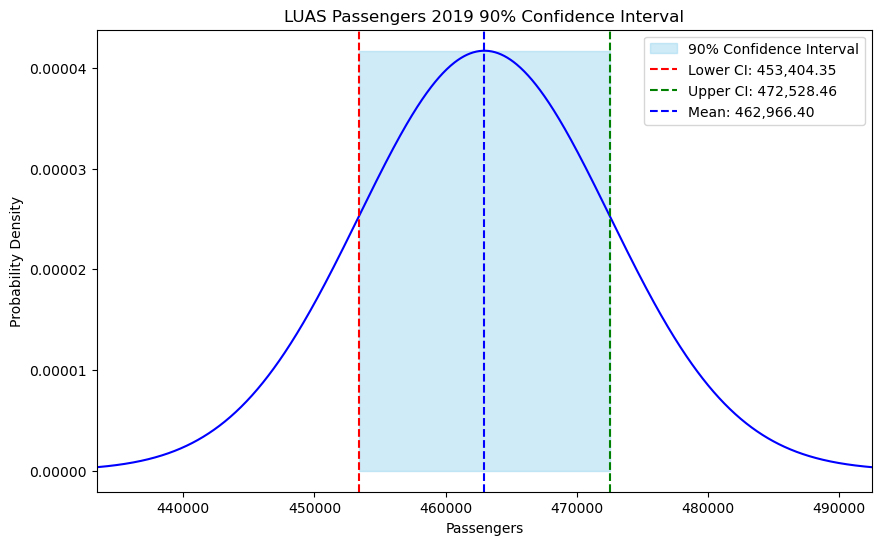

In [20]:


# Confidence interval values
confidence_interval = (453404.34741473, 472528.46027757)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 20000, confidence_interval[1] + 20000, 1000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2019 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 20000, confidence_interval[1] + 20000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We want to know the average of passengers for 2020. We will use 90% confidence

In [21]:
sdfa_2020.describe()

,VALUE,Year
count,104.000000,104.0
mean,185157.009615,2020.0
std,139494.873679,0.0
min,19727.000000,2020.0
25%,92848.000000,2020.0
50%,152092.000000,2020.0
75%,203166.000000,2020.0
max,482333.000000,2020.0


In [22]:
X = sdfa_2020.iloc[:,2:3].values

In [23]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([162453.51554746]), array([207860.50368331]))

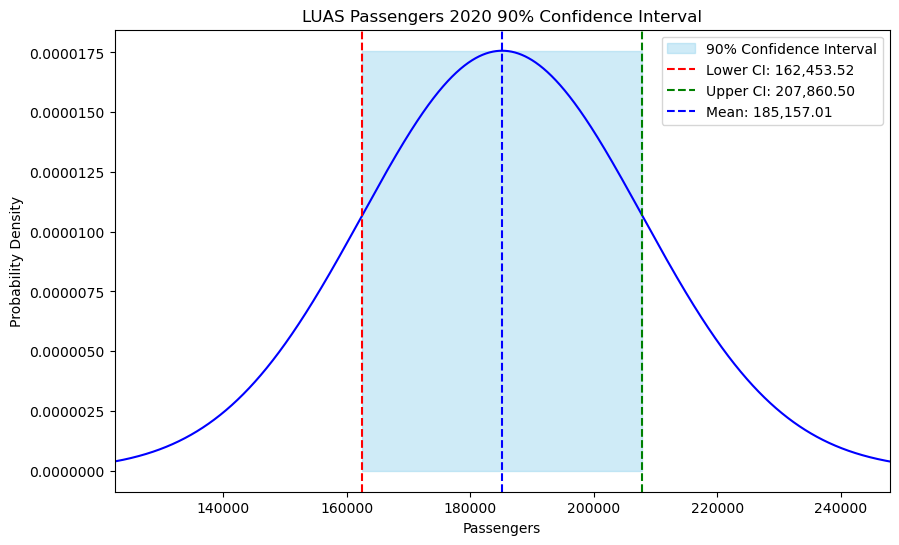

In [24]:
# Confidence interval values
confidence_interval = (162453.51554746, 207860.50368331)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 40000, confidence_interval[1] + 40000, 2000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2020 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 40000, confidence_interval[1] + 40000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We want to know the average of passengers for 2021. We will use 90% confidence

In [25]:
sdfa_2021.describe()

,VALUE,Year
count,104.000000,104.0
mean,187611.134615,2021.0
std,82667.596263,0.0
min,64278.000000,2021.0
25%,102652.500000,2021.0
50%,195341.500000,2021.0
75%,258089.000000,2021.0
max,327777.000000,2021.0


In [26]:
X = sdfa_2021.iloc[:,2:3].values

In [27]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([174156.56648787]), array([201065.7027429]))

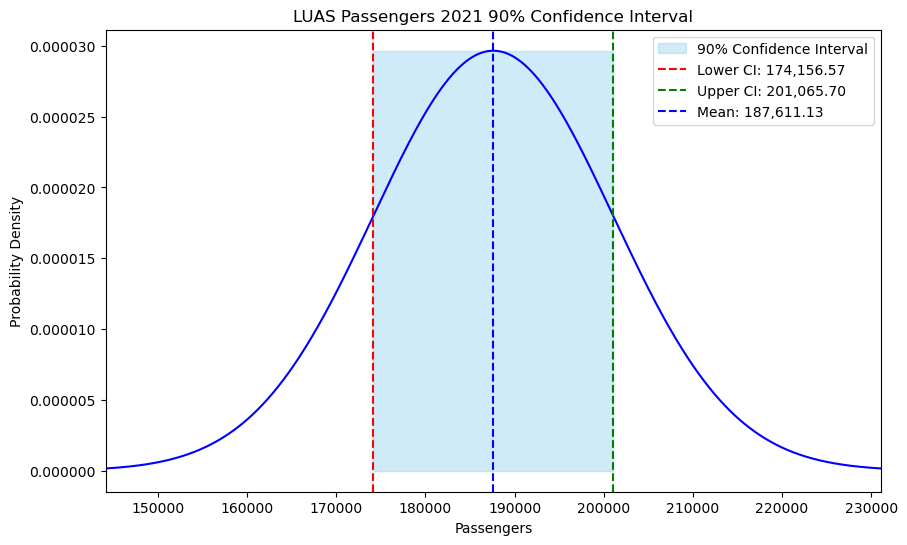

In [28]:
# Confidence interval values
confidence_interval = (174156.56648787, 201065.7027429)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 30000, confidence_interval[1] + 30000, 2000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2021 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 30000, confidence_interval[1] + 30000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We want to know the average of passengers for 2022. We will use 90% confidence

In [29]:
sdfa_2022.describe()

,VALUE,Year
count,104.000000,104.0
mean,373602.250000,2022.0
std,90580.590311,0.0
min,161546.000000,2022.0
25%,306127.500000,2022.0
50%,354642.000000,2022.0
75%,442544.750000,2022.0
max,547010.000000,2022.0


In [30]:
X = sdfa_2022.iloc[:,2:3].values

In [31]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([358859.80219134]), array([388344.69780866]))

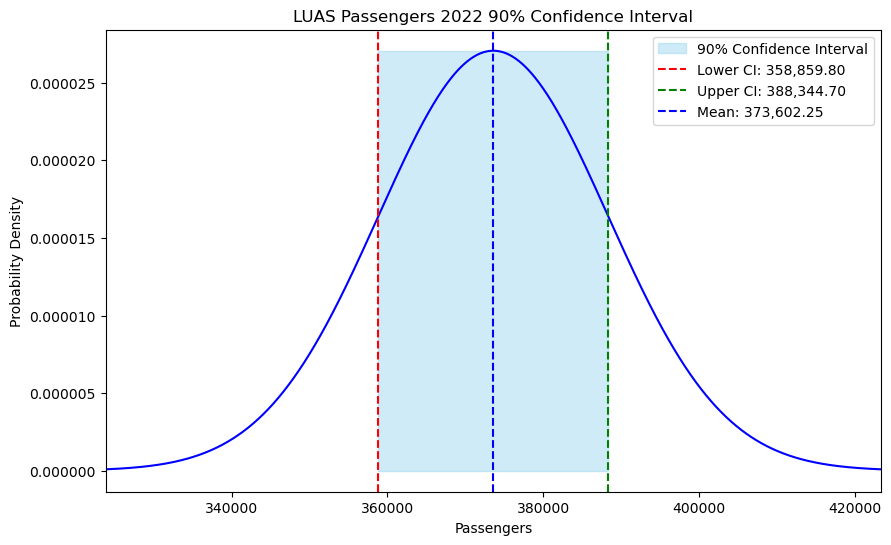

In [32]:
# Confidence interval values
confidence_interval = (358859.80219134, 388344.69780866)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 35000, confidence_interval[1] + 35000, 2000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2022 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 35000, confidence_interval[1] + 35000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We will perform a HT to compare the average passengers between Red and Green Luas lines for 2019

In [33]:
R = sdfa_2019.VALUE[sdfa_2019.Luas_Line == 'Red line']
G = sdfa_2019.VALUE[sdfa_2019.Luas_Line == 'Green line']

We work with data from the sample, so we can use a t test to verify whether the average charges is the same for both of them.<br>
We need x bar, we need S and the sample size to perform the hypothesis test.<br>
H0 : mu red luas = mu green luas<br>
H1: mu red luas != mu green luas

In [34]:
R.describe()

count        52.000000
mean     460492.461538
std       55856.204280
min      259211.000000
25%      442274.750000
50%      462205.500000
75%      498051.500000
max      556229.000000
Name: VALUE, dtype: float64

In [35]:
G.describe()

count        52.000000
mean     465440.346154
std       61957.199702
min      275394.000000
25%      440231.750000
50%      464353.000000
75%      500782.750000
max      622699.000000
Name: VALUE, dtype: float64

In [36]:
#We perform the t test for two populations
from scipy import stats

t_test = stats.ttest_ind_from_stats(mean1 = 460492.461538, std1 =55856.204280, nobs1 = 52, mean2 = 465440.346154, std2 =  61957.199702, nobs2 = 52, equal_var = False)

display(t_test)

Ttest_indResult(statistic=-0.4277204174837884, pvalue=0.6697659703442436)

As alpha was not given, we can assume 0.05 as alpha.<br>
As p value < alpha, then we accept H0 <br>
Interpretation: At a 5% significance level there is enough evidence to state that 2019 average passengers<br> for red and green luas lines are similar.

# We will perform a HT to compare the average passengers between Red and Green Luas lines for 2020

In [37]:
R = sdfa_2020.VALUE[sdfa_2020.Luas_Line == 'Red line']
G = sdfa_2020.VALUE[sdfa_2020.Luas_Line == 'Green line']

We work with data from the sample, so we can use a t test to verify whether the average charges is the same for both of them.<br>
We need x bar, we need S and the sample size to perform the hypothesis test.<br>
H0 : mu red luas = mu green luas<br>
H1: mu red luas != mu green luas

In [38]:
R.describe()

count        52.000000
mean     187865.211538
std      135942.731937
min       29666.000000
25%      100538.500000
50%      155910.000000
75%      200955.000000
max      472655.000000
Name: VALUE, dtype: float64

In [39]:
G.describe()

count        52.000000
mean     182448.807692
std      144235.232686
min       19727.000000
25%       82192.250000
50%      148967.500000
75%      206877.250000
max      482333.000000
Name: VALUE, dtype: float64

In [40]:
#We perform the t test for two populations
from scipy import stats

t_test = stats.ttest_ind_from_stats(mean1 = 187865.211538, std1 =135942.731937, nobs1 = 52, mean2 = 182448.807692, std2 =  144235.232686, nobs2 = 52, equal_var = False)

display(t_test)

Ttest_indResult(statistic=0.19706232126254775, pvalue=0.8441722800045101)

As alpha was not given, we can assume 0.05 as alpha.<br>
As p value > alpha, then we reject H0 <br>
Interpretation: At a 5% significance level there is enough evidence to state that 2020 average passengers<br> for red and green luas lines are different.


# 3.3.	Inferential statistics
# 3.3.1.	Parametric
# *3.3.1.1.	Hypothesis Test Two Populations*

In [304]:
#Starting with Parametric tests, for that we need to find the right datasets

In [305]:
import eurostat
# Modal split of inland passenger transport
# Unit of measure (% based on passenger-kilometres) : one passenger-km is one passenger transported over one kilometre
# https://ec.europa.eu/eurostat/databrowser/view/TRAN_HV_PSMOD__custom_2638259/bookmark/table?lang=en&bookmarkId=2d735f97-a7d6-4b24-bc27-a6c8e21db6a7

sdf1 = eurostat.get_data_df('TRAN_HV_PSMOD',True)                                                                 
sdf1.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1990_flag,1991_value,1991_flag,1992_value,1992_flag,1993_value,1993_flag,1994_value,1994_flag,1995_value,1995_flag,1996_value,1996_flag,1997_value,1997_flag,1998_value,1998_flag,1999_value,1999_flag,2000_value,2000_flag,2001_value,2001_flag,2002_value,2002_flag,2003_value,2003_flag,2004_value,2004_flag,2005_value,2005_flag,2006_value,2006_flag,2007_value,2007_flag,2008_value,2008_flag,2009_value,2009_flag,2010_value,2010_flag,2011_value,2011_flag,2012_value,2012_flag,2013_value,2013_flag,2014_value,2014_flag,2015_value,2015_flag,2016_value,2016_flag,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag
0,A,PC,BUS_TOT,AT,11.0,,10.6,,10.5,,10.7,,10.6,,10.9,,10.7,,10.9,,10.9,,10.7,,11.0,,10.9,,10.9,,10.9,,11.0,,10.5,,10.4,,10.8,,10.0,e,9.1,e,9.3,e,9.4,e,10.0,,9.9,,9.9,,9.9,,9.9,,10.0,,9.5,be,9.7,e,9.3,e,9.0,e
1,A,PC,BUS_TOT,BE,10.6,e,10.7,e,10.7,e,10.9,e,11.8,e,11.3,e,11.3,e,11.1,e,11.0,e,10.9,e,10.8,e,11.0,e,11.7,e,13.0,e,13.2,e,13.0,b,13.2,,14.3,,14.4,,13.3,,12.3,,12.8,,12.5,be,15.2,e,11.5,be,11.0,e,10.5,e,10.2,e,10.3,e,10.4,e,8.2,e,8.2,e
2,A,PC,BUS_TOT,BG,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,29.3,e,25.3,e,24.0,e,24.5,e,21.9,e,31.4,e,32.0,e,33.4,e,28.1,e,25.0,e,24.3,e,22.7,e,21.8,e,20.8,e,16.8,e,16.4,e,15.9,e,14.8,e,14.0,e,15.1,e,14.6,e,14.1,e,13.1,e,12.0,e,13.0,e,8.6,e,8.0,e
3,A,PC,BUS_TOT,CH,3.7,,3.9,,4.0,,3.9,,4.0,,3.8,,3.6,,3.6,,5.3,,5.2,,5.2,,5.2,,5.1,,5.2,,5.2,,5.3,,5.6,,5.5,,5.2,,5.1,,5.1,,5.7,,5.7,,5.7,e,5.8,e,5.9,e,5.9,e,5.9,e,5.9,e,6.1,e,5.8,e,5.9,e
4,A,PC,BUS_TOT,CY,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,22.7,e,22.9,e,22.6,e,22.3,e,22.1,e,22.3,e,22.5,e,22.6,e,23.6,e,21.2,e,20.8,e,20.4,e,19.7,e,18.8,e,17.6,e,18.1,e,18.3,e,18.7,e,18.5,e,18.2,e,18.7,e,18.6,e,19.0,e,18.9,e,18.5,e,12.6,e,12.7,e


In [306]:
# Tyding up sfd1
# Filter columns that do not contain '_flag'
sdf1 = sdf1.filter(regex='^(?!.*_flag)')
sdf1.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value
0,A,PC,BUS_TOT,AT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.0,10.9,10.9,10.9,11.0,10.5,10.4,10.8,10.0,9.1,9.3,9.4,10.0,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0
1,A,PC,BUS_TOT,BE,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,10.8,11.0,11.7,13.0,13.2,13.0,13.2,14.3,14.4,13.3,12.3,12.8,12.5,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2
2,A,PC,BUS_TOT,BG,NaN,NaN,NaN,NaN,NaN,29.3,25.3,24.0,24.5,21.9,31.4,32.0,33.4,28.1,25.0,24.3,22.7,21.8,20.8,16.8,16.4,15.9,14.8,14.0,15.1,14.6,14.1,13.1,12.0,13.0,8.6,8.0
3,A,PC,BUS_TOT,CH,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,5.2,5.2,5.1,5.2,5.2,5.3,5.6,5.5,5.2,5.1,5.1,5.7,5.7,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9
4,A,PC,BUS_TOT,CY,NaN,NaN,NaN,NaN,NaN,22.7,22.9,22.6,22.3,22.1,22.3,22.5,22.6,23.6,21.2,20.8,20.4,19.7,18.8,17.6,18.1,18.3,18.7,18.5,18.2,18.7,18.6,19.0,18.9,18.5,12.6,12.7


In [307]:
# Renaming columns
sdf1 = sdf1.rename(columns={'geo\\TIME_PERIOD': 'Country_code','vehicle':'Vehicle_type'})

In [308]:
# Dropping not needed rows:
# From column 'Vehicle_type' we don't need 'TRN_BUS_TOT_AVD'
# From column 'Country_code' we don't need 'EU27_2020' and 'EU28'
sdf1 = sdf1[(sdf1['Vehicle_type'] != 'TRN_BUS_TOT_AVD') & ~sdf1['Country_code'].isin(['EU27_2020', 'EU28'])]

# Drop rows with null values
sdf1 = sdf1.dropna()

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
sdf1 = sdf1.drop(['freq', 'unit'], axis=1)

# Trimming 'BUS_TOT' to have just 'BUS'
sdf1['Vehicle_type'] = sdf1['Vehicle_type'].str.replace('_TOT', '')

In [309]:
sdf3 = sdf1.copy()

In [46]:
sdf1.head()

,Vehicle_type,Country_code,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,...,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value
0,BUS,AT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,...,10.0,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0
1,BUS,BE,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,...,12.5,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2
3,BUS,CH,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,...,5.7,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9
6,BUS,DE,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,...,7.1,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8
7,BUS,DK,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,...,9.8,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1


In [47]:
# Concatenate 'Country_code' and 'Vehicle_type'
sdf1['Country_Vehicle'] = sdf1['Country_code'] + '_' + sdf1['Vehicle_type']

# Drop the original columns
sdf1 = sdf1.drop(['Vehicle_type', 'Country_code'], axis=1)

sdf1.head()

,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,Country_Vehicle
0,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,...,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0,AT_BUS
1,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,...,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2,BE_BUS
3,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,...,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9,CH_BUS
6,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,7.0,6.9,...,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8,DE_BUS
7,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,14.1,13.9,...,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1,DK_BUS


In [48]:
# We need to organise sdf1, basically I want to have 'Year', 'Country_Vehicle' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in sdf1.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in sdf1.iterrows():
            value = row[col]
            country_vehicle = row['Country_Vehicle']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Vehicle': country_vehicle,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
Y_CV_V_df = pd.DataFrame(final_list)

# Pivot the DataFrame
Y_CV_V_df = Y_CV_V_df.pivot_table(index=['Year', 'Country_Vehicle'], columns='Category', values='Value').reset_index()
Y_CV_V_df = Y_CV_V_df.rename_axis(None, axis=1) # Index with no name as it should be
   
sdf1 = Y_CV_V_df.copy() #Reusing variable sdf1

sdf1.head()

,Year,Country_Vehicle,value
0,1990,AT_BUS,11.0
1,1990,AT_CAR,77.1
2,1990,AT_TRN,11.9
3,1990,BE_BUS,10.6
4,1990,BE_CAR,83.3


In [49]:
# Pivot the DataFrame
sdf1 = sdf1.pivot(index='Year', columns='Country_Vehicle', values='value').reset_index()
sdf1 = sdf1.rename_axis(None, axis=1)
sdf1.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,...,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.0,77.1,11.9,10.6,83.3,6.1,3.7,82.1,14.2,...,30.5,18.4,71.5,10.1,9.5,84.1,6.5,30.6,62.7,6.7
1,1991,10.6,77.0,12.4,10.7,83.3,6.1,3.9,81.1,15.0,...,24.6,18.6,71.4,9.9,9.5,84.7,5.9,29.3,66.4,4.3
2,1992,10.5,77.0,12.5,10.7,83.3,6.0,4.0,81.4,14.6,...,20.3,22.7,68.2,9.0,9.4,84.8,5.8,23.0,73.9,3.0
3,1993,10.7,77.2,12.1,10.9,83.3,5.9,3.9,80.9,15.2,...,17.7,19.3,72.2,8.5,9.3,84.4,6.3,21.1,75.8,3.1
4,1994,10.6,77.8,11.6,11.8,82.6,5.6,4.0,79.8,16.2,...,15.6,17.9,74.3,7.8,9.3,84.4,6.3,20.4,76.6,3.0


In [50]:
# In case you want to print the final dataset, worthwile to have a look
#sdf1.to_csv('Modal_split_of_inland_passenger_transport.csv', index=False)

In [51]:
# sdf1.describe(include='all').T # Transposing columns to see each Country_Vehicle
# passing the stats into 'sdf1b' dataframe
sdf1b = (sdf1.describe(include='all').T).reset_index().rename_axis(None, axis=1).copy()

In [52]:
sdf1b.head(10)

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Year,32,32,1990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6
6,BE_TRN,32.0,NaN,NaN,NaN,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2
7,CH_BUS,32.0,NaN,NaN,NaN,5.09375,0.808398,3.6,4.825,5.2,5.725,6.1
8,CH_CAR,32.0,NaN,NaN,NaN,78.528125,2.883796,73.9,75.0,79.55,81.025,82.5
9,CH_TRN,32.0,NaN,NaN,NaN,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0


In [53]:
# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
sdf1b = sdf1b.drop(0)

# Renaming columns
sdf1b = sdf1b.rename(columns={'index': 'Country_Vehicle'})

In [54]:
sdf1b.head()

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6


In [55]:
# Filtering by each Vehicle, it will help visually to have each category together
sdf1_bus = sdf1b[sdf1b['Country_Vehicle'].str.contains('BUS')]
sdf1_car = sdf1b[sdf1b['Country_Vehicle'].str.contains('CAR')]
sdf1_trn = sdf1b[sdf1b['Country_Vehicle'].str.contains('TRN')]

# HT Test Ireland & Slovenia BUS % average on passenger-kilometres.

In [56]:
sdf1_bus

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
7,CH_BUS,32.0,NaN,NaN,NaN,5.09375,0.808398,3.6,4.825,5.2,5.725,6.1
10,DE_BUS,32.0,NaN,NaN,NaN,7.0,0.864348,4.8,6.7,7.1,7.3,9.1
13,DK_BUS,32.0,NaN,NaN,NaN,11.740625,2.805623,6.8,9.8,10.8,14.0,17.4
16,EL_BUS,32.0,NaN,NaN,NaN,22.078125,6.268649,12.3,17.45,19.6,28.125,32.4
19,ES_BUS,32.0,NaN,NaN,NaN,12.75625,3.435952,6.4,11.875,13.0,13.55,23.3
22,FI_BUS,32.0,NaN,NaN,NaN,11.03125,1.430416,8.3,9.9,10.5,12.225,13.5
25,FR_BUS,32.0,NaN,NaN,NaN,5.60625,0.498344,4.9,5.2,5.5,6.025,6.5
28,HU_BUS,32.0,NaN,NaN,NaN,22.20625,2.564011,14.3,21.25,22.8,24.025,25.0


We want to analyse the percentage average on passenger-kilometres for Vehicle BUS.<br>
As we have to use Ireland as our baseline, we will have Ireland (IE) and the other choice would be Slovenia (SI),<br>
We can see that both averages are quite similar. Our taks is to determine whether they have differences or not,<br>
using 5% significance level.<br><br>
Hypothesis:<br>
H0: mu IE_BUS = mu SI_BUS; There is no significant difference between the percentage average on passenger-kilometres for Vehicle BUS in Ireland and Slovenia.<br>
H1: mu IE_BUS != mu SI_BUS; There is a significant difference between the percentage average on passenger-kilometres for Vehicle BUS in Ireland and Slovenia.

In [57]:
# We need to define our variables

X1 = sdf1['IE_BUS']
X2 = sdf1['SI_BUS']

In [58]:
from scipy import stats

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

TtestResult(statistic=-0.5914280128545741, pvalue=0.5581828652256509, df=33.67864035197684)

As p_value > alpha, then we accept H0. Since the p-value is greater than the significance level 5%,we don't have enough evidence to reject the null hypothesis. There is not enough evidence to state that there is a significant difference between the percentage average on passenger-kilometres for Vehicle BUS in Ireland and Slovenia.<br>
Let's plot the results to better understand it.

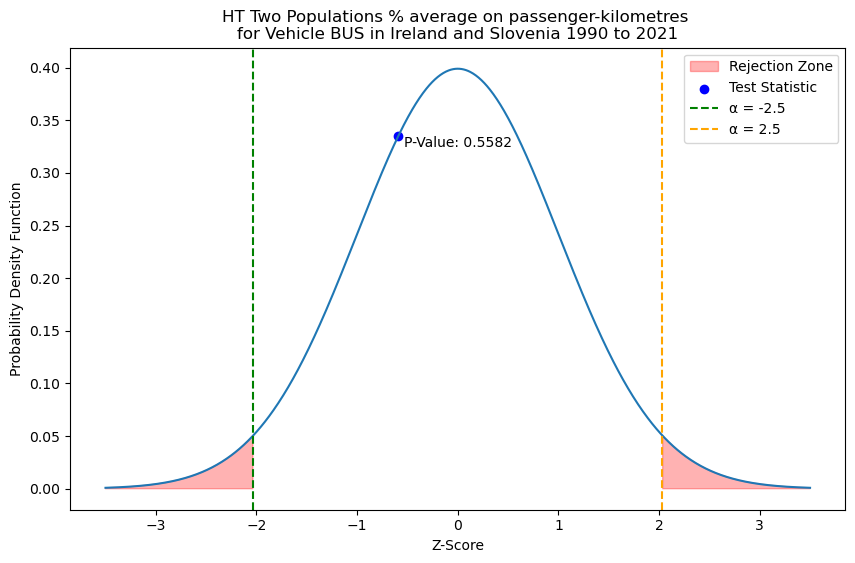

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Using data calculated above
statistic = -0.5914280128545741
p_value = 0.5581828652256509
alpha = 0.05
degrees_of_freedom = 33.67864035197684

plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility

# Define critical values
critical_value_positive = t.ppf(1 - alpha/2, df=degrees_of_freedom)
critical_value_negative = -critical_value_positive

# Generating x values to plot the curve
x = np.linspace(-3.5, 3.5, 1000)

# Calculating the normal distribution curve
y = norm.pdf(x, 0, 1)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
plt.fill_between(x, 0, y, where=[(val < critical_value_negative or val > critical_value_positive) for val in x], color='red', alpha=0.3, label='Rejection Zone')

# Marking the test statistic over the bell
plt.scatter([statistic], [norm.pdf(statistic)], color='blue', label='Test Statistic')

# Marking alpha values
plt.axvline(critical_value_negative, color='green', linestyle='--', label='α = -2.5')
plt.axvline(critical_value_positive, color='orange', linestyle='--', label='α = 2.5')

# Adding p-value number
plt.text(statistic+0.06, norm.pdf(statistic)-0.01, f'P-Value: {p_value:.4f}', color='black')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.title('HT Two Populations % average on passenger-kilometres \nfor Vehicle BUS in Ireland and Slovenia 1990 to 2021')

# Legend
plt.legend()

# Plotting
plt.show()


# HT Test Ireland & Denmark CAR % average on passenger-kilometres.

In [60]:
sdf1_car

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6
8,CH_CAR,32.0,NaN,NaN,NaN,78.528125,2.883796,73.9,75.0,79.55,81.025,82.5
11,DE_CAR,32.0,NaN,NaN,NaN,85.346875,1.169501,83.3,84.5,85.4,85.8,88.8
14,DK_CAR,32.0,NaN,NaN,NaN,79.909375,2.914409,75.2,77.65,79.95,81.925,87.3
17,EL_CAR,32.0,NaN,NaN,NaN,76.228125,7.092351,64.0,69.725,78.75,81.6,87.1
20,ES_CAR,32.0,NaN,NaN,NaN,81.39375,3.953189,68.5,80.8,81.65,82.55,89.5
23,FI_CAR,32.0,NaN,NaN,NaN,83.878125,1.59105,81.2,82.375,84.2,84.9,87.7
26,FR_CAR,32.0,NaN,NaN,NaN,85.378125,1.13101,83.3,84.575,85.5,86.4,87.0
29,HU_CAR,32.0,NaN,NaN,NaN,66.6125,4.557854,60.5,63.65,65.1,68.725,79.3


We want to analyse the percentage average on passenger-kilometres for Vehicle CAR.<br>
As we have to use Ireland as our baseline, we will have Ireland (IE) and the other choice would be Denmark (DK),<br>
I'm taking Denmark as it is a Nordic country and I'm thinking that maybe in average Danish people will have the same<br>
preferences as the Irish people in terms of using cars. Let's see if at 5% significance level,<br>
the null hypothesis (H0) will be rejected or accepted.<br><br>
Hypothesis:<br>
H0: mu IE_CAR = mu DK_CAR; There is no significant difference between the percentage average on passenger-kilometres for Vehicle CAR in Ireland and Denmark.<br>
H1: mu IE_CAR != mu DK_CAR; There is a significant difference between the percentage average on passenger-kilometres for Vehicle CAR in Ireland and Denmark.

In [61]:
# We need to define our variables

X1 = sdf1['IE_CAR']
X2 = sdf1['DK_CAR']

In [62]:
from scipy import stats

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

TtestResult(statistic=5.22119305877525, pvalue=4.987954681712246e-06, df=42.650292236590985)

As p_value < alpha, then we reject H0. Since the p-value is lower than the significance level 5%,we have enough evidence to reject the null hypothesis. There is enough evidence to state that there is a significant difference between the percentage average on passenger-kilometres for Vehicle CAR in Ireland and Denmark.<br>
Let's plot the results to better understand it.

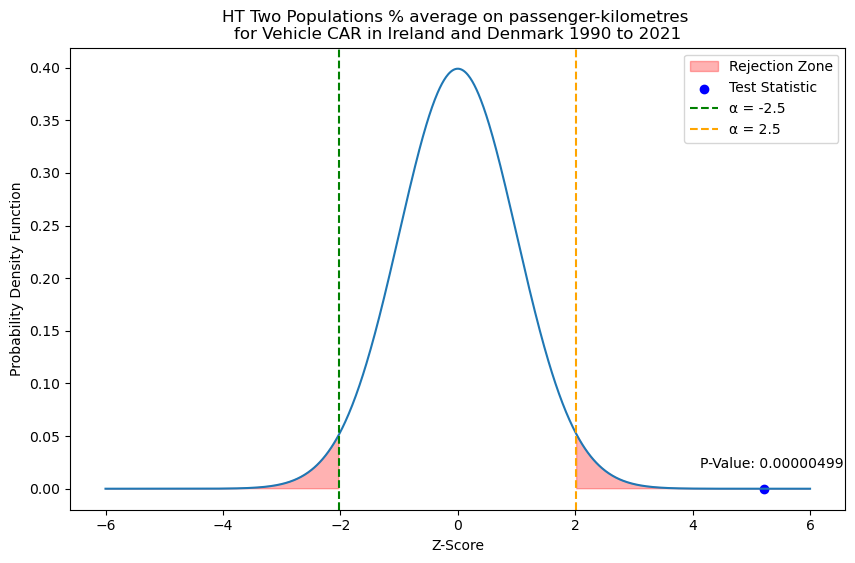

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Using data calculated above
statistic = 5.22119305877525
p_value = 4.987954681712246e-06
alpha = 0.05
degrees_of_freedom = 42.650292236590985

plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility

# Define critical values
critical_value_positive = t.ppf(1 - alpha/2, df=degrees_of_freedom)
critical_value_negative = -critical_value_positive

# Generating x values to plot the curve
x = np.linspace(-6, 6, 1000)

# Calculating the normal distribution curve
y = norm.pdf(x, 0, 1)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
plt.fill_between(x, 0, y, where=[(val < critical_value_negative or val > critical_value_positive) for val in x], color='red', alpha=0.3, label='Rejection Zone')

# Marking the test statistic over the bell
plt.scatter([statistic], [norm.pdf(statistic)], color='blue', label='Test Statistic')

# Marking alpha values
plt.axvline(critical_value_negative, color='green', linestyle='--', label='α = -2.5')
plt.axvline(critical_value_positive, color='orange', linestyle='--', label='α = 2.5')

# Adding p-value number
plt.text(statistic -1.1, norm.pdf(statistic)+0.02, f'P-Value: {p_value:.8f}', color='black')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.title('HT Two Populations % average on passenger-kilometres \nfor Vehicle CAR in Ireland and Denmark 1990 to 2021')

# Legend
plt.legend()

# Plotting
plt.show()


# HT Test Ireland & Switzerland TRN % average on passenger-kilometres.

In [64]:
sdf1_trn

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
6,BE_TRN,32.0,NaN,NaN,NaN,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2
9,CH_TRN,32.0,NaN,NaN,NaN,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0
12,DE_TRN,32.0,NaN,NaN,NaN,7.659375,0.808766,5.4,7.275,7.6,8.225,9.3
15,DK_TRN,32.0,NaN,NaN,NaN,8.365625,1.257906,5.8,7.95,8.4,9.3,10.3
18,EL_TRN,32.0,NaN,NaN,NaN,1.696875,0.873807,0.6,0.975,1.6,2.2,3.6
21,ES_TRN,32.0,NaN,NaN,NaN,5.84375,0.998366,4.1,5.175,5.45,6.625,8.5
24,FI_TRN,32.0,NaN,NaN,NaN,5.084375,0.437079,3.8,4.95,5.15,5.3,6.2
27,FR_TRN,32.0,NaN,NaN,NaN,9.028125,0.821578,7.5,8.35,9.1,9.8,10.3
30,HU_TRN,32.0,NaN,NaN,NaN,11.171875,2.125609,6.0,10.0,11.85,12.9,14.7


We want to analyse the percentage average on passenger-kilometres for Vehicle TRN.<br>
As we have to use Ireland as our baseline, we will have Ireland (IE) and the other choice would be Slovenia (SI),<br>
Slovenia is the closest in average to Ireland, for the rest of the countries H0 most likely will be rejected.<br>
Maybe for Slovenia we will accept H0.<br>
using 5% significance level.<br><br>
Hypothesis:<br>
H0: mu IE_TRN = mu SI_TRN; There is no significant difference between the percentage average on passenger-kilometres for Vehicle TRN in Ireland and Slovenia.<br>
H1: mu IE_TRN != mu SI_TRN; There is a significant difference between the percentage average on passenger-kilometres for Vehicle TRN in Ireland and Slovenia.

In [65]:
# We need to define our variables

X1 = sdf1['IE_TRN']
X2 = sdf1['SI_TRN']

In [66]:
from scipy import stats

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

TtestResult(statistic=2.436805492627794, pvalue=0.018523237319062826, df=48.65558323773318)

As p_value < alpha, then we reject H0. Since the p-value is lower than the significance level 5%,we have enough evidence to reject the null hypothesis. There is enough evidence to state that there is a significant difference between the percentage average on passenger-kilometres for Vehicle TRN in Ireland and Slovenia.<br>
Let's plot the results to better understand it.

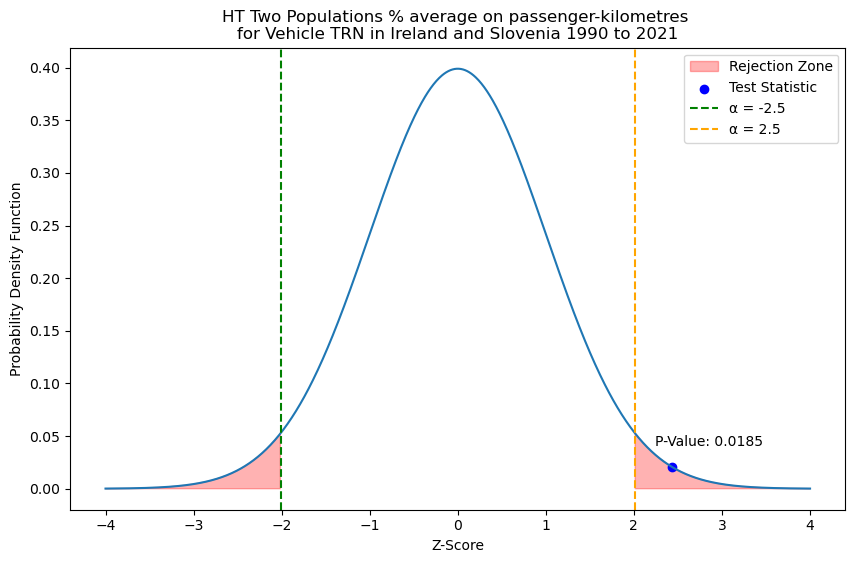

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Using data calculated above
statistic = 2.436805492627794
p_value = 0.018523237319062826
alpha = 0.05
degrees_of_freedom = 48.65558323773318

plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility

# Define critical values
critical_value_positive = t.ppf(1 - alpha/2, df=degrees_of_freedom)
critical_value_negative = -critical_value_positive

# Generating x values to plot the curve
x = np.linspace(-4, 4, 1000)

# Calculating the normal distribution curve
y = norm.pdf(x, 0, 1)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
plt.fill_between(x, 0, y, where=[(val < critical_value_negative or val > critical_value_positive) for val in x], color='red', alpha=0.3, label='Rejection Zone')

# Marking the test statistic over the bell
plt.scatter([statistic], [norm.pdf(statistic)], color='blue', label='Test Statistic')

# Marking alpha values
plt.axvline(critical_value_negative, color='green', linestyle='--', label='α = -2.5')
plt.axvline(critical_value_positive, color='orange', linestyle='--', label='α = 2.5')

# Adding p-value number
plt.text(statistic -0.2, norm.pdf(statistic)+0.02, f'P-Value: {p_value:.4f}', color='black')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.title('HT Two Populations % average on passenger-kilometres \nfor Vehicle TRN in Ireland and Slovenia 1990 to 2021')

# Legend
plt.legend()

# Plotting
plt.show()


# 3.3.1.2.	Anova one-way

In [68]:
# Air passenger transport by main airports in each reporting country
# Unit of measure: Annual passengers carried
# https://ec.europa.eu/eurostat/databrowser/view/AVIA_PAOA__custom_2638371/bookmark/table?lang=en&bookmarkId=9ff9f1d8-f4e7-4579-9454-806c644e90a1
sdf2 = eurostat.get_data_df('AVIA_PAOA',True) #It takes 5-10 minutes to load...                                                             
sdf2.head()

,freq,unit,tra_meas,rep_airp,schedule,tra_cov\TIME_PERIOD,1993_value,1993_flag,1993-01_value,1993-01_flag,...,2023-09_value,2023-09_flag,2023-10_value,2023-10_flag,2023-Q1_value,2023-Q1_flag,2023-Q2_value,2023-Q2_flag,2023-Q3_value,2023-Q3_flag
0,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL,1956.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
1,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU27_2020,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
2,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU28,1525.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
3,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU27_2020,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
4,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU28,431.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:


In [69]:
# Creating a backup
sdf2_backup = sdf2.copy()

In [70]:
sdf2 = sdf2_backup.copy()

In [71]:
# Tyding up sfd2
# Filter columns that do not contain '_flag'
sdf2 = sdf2.filter(regex='^(?!.*_flag)')
sdf2.head()

,freq,unit,tra_meas,rep_airp,schedule,tra_cov\TIME_PERIOD,1993_value,1993-01_value,1993-02_value,1993-03_value,...,2023-04_value,2023-05_value,2023-06_value,2023-07_value,2023-08_value,2023-09_value,2023-10_value,2023-Q1_value,2023-Q2_value,2023-Q3_value
0,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL,1956.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU27_2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU28,1525.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU27_2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU28,431.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# We need to get annual passengers carried
# Filtering based on criteria from:
# https://ec.europa.eu/eurostat/databrowser/view/AVIA_PAOA__custom_2638371/bookmark/table?lang=en&bookmarkId=9ff9f1d8-f4e7-4579-9454-806c644e90a1
sdf2 = sdf2[(sdf2['freq'] == 'A') & (sdf2['tra_meas'] == 'PAS_BRD') &
            (sdf2['schedule'] == 'TOT')  & (sdf2['tra_cov\\TIME_PERIOD'] == 'TOTAL')]

In [73]:
# Kepping following columns
Col_no_drop = ['freq', 'unit', 'tra_meas', 'rep_airp', 'schedule', 'tra_cov\\TIME_PERIOD']
pattern = r'\d{4}_value'  # Matching 'YYYY_value' pattern

# Use a regular expression to filter columns
Col_filter = sdf2.columns[sdf2.columns.str.match(pattern)]  # Columns matching the pattern

# Combine additional columns with the filtered ones
Col_total = Col_no_drop + list(Col_filter)

# Filtering sdf2 wiht desired columns
sdf2 = sdf2[Col_total]

In [74]:
#Dropping not needed columns:

sdf2 = sdf2.drop(['freq', 'unit','tra_meas','schedule','tra_cov\\TIME_PERIOD'], axis=1).reset_index()
sdf2 = sdf2.drop(['index'], axis=1)
sdf2.head()

,rep_airp,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,AT_LOWG,393440.0,446219.0,496184.0,520286.0,593361.0,620805.0,645253.0,723932.0,722471.0,...,894785.0,911708.0,977732.0,990208.0,970037.0,1042519.0,1049248.0,201132.0,229492.0,568833.0
1,AT_LOWI,398493.0,421759.0,440038.0,472134.0,517649.0,585377.0,599678.0,667226.0,655949.0,...,991550.0,1004755.0,1011221.0,1013641.0,1095192.0,1125223.0,1151272.0,490108.0,126743.0,726695.0
2,AT_LOWK,199137.0,203699.0,200213.0,196849.0,218650.0,222716.0,212299.0,229157.0,224194.0,...,263835.0,227850.0,230338.0,196036.0,216784.0,229755.0,211153.0,49736.0,29722.0,83714.0
3,AT_LOWL,321129.0,390317.0,489119.0,573104.0,627838.0,640404.0,653807.0,707640.0,678682.0,...,560092.0,575012.0,541287.0,443273.0,413950.0,475124.0,445423.0,52755.0,70454.0,214199.0
4,AT_LOWS,970732.0,950530.0,1042219.0,1037924.0,1083428.0,1118521.0,1117161.0,1193228.0,1226085.0,...,1676525.0,1838545.0,1852219.0,1753698.0,1900799.0,1861010.0,1731428.0,675204.0,303746.0,1244528.0


In [75]:
# Renaming columns
sdf2 = sdf2.rename(columns={'rep_airp': 'Country_Icao'})

In [76]:
# Importing icao codes to bring in airport names
# source: https://github.com/ip2location/ip2location-iata-icao/blob/master/iata-icao.csv
sdf2a = pd.read_csv('iata-icao.csv')

In [77]:
sdf2a.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Ash Shariqah,SHJ,OMSJ,Sharjah International Airport,25.3286,55.5172
1,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
2,AE,Al Fujayrah,FJR,OMFJ,Fujairah International Airport,25.1122,56.3240
3,AE,Abu Zaby,XSB,OMBY,Sir Bani Yas Airport,24.2836,52.5803
4,AE,Ra's al Khaymah,RKT,OMRK,Ras Al Khaimah International Airport,25.6135,55.9388


In [78]:
# Create a new column by concatenating 'country_code' and 'Airport_Icao'
sdf2a['Country_Icao'] = sdf2a['country_code'] + '_' + sdf2a['icao']
# Renaming columns
sdf2a = sdf2a.rename(columns={'airport': 'Airport_Name'})

In [79]:
# Bringing in Airport Name to sdf2
sdf2 = pd.merge(sdf2, sdf2a[['Country_Icao', 'Airport_Name']], on='Country_Icao', how='inner')
# Move the 'Airport_Icao' column to the second position
sdf2.insert(1, 'Airport_Name', sdf2.pop('Airport_Name'))

In [80]:
# As Ireland is our baseline let's filter and see which airports we have
ireland_airports = sdf2[sdf2['Country_Icao'].str.startswith('IE_')]
pd.set_option('display.max_columns', None)
ireland_airports

,Country_Icao,Airport_Name,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
250,IE_EICK,Cork Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2192643.0,2265901.0,2747190.0,3023527.0,3183146.0,3258967.0,2767776.0,2422872.0,2358904.0,2333643.0,2252636.0,2138057.0,2065678.0,2226231.0,2301450.0,2387806.0,2585466.0,527014.0,255014.0,2238455.0
251,IE_EICM,Galway Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257400.0,245918.0,90018.0,266473.0,195804.0,154814.0,67134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,IE_EIDW,Dublin Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,15915900.0,17167371.0,18504763.0,21265834.0,23307302.0,23506926.0,20507456.0,18426823.0,18758105.0,19090781.0,20148574.0,21694893.0,24962518.0,27778845.0,29454474.0,31319419.0,32676251.0,7267240.0,8266271.0,27793345.0
253,IE_EIKN,Ireland West Airport Knock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524648.0,608257.0,544042.0,629712.0,606421.0,586393.0,614172.0,677368.0,665558.0,703670.0,684671.0,735869.0,748505.0,770908.0,805443.0,142532.0,174027.0,709540.0
254,IE_EIKY,Kerry Airport (Farranfore Airport),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385825.0,392576.0,391138.0,419941.0,356737.0,383866.0,292353.0,280688.0,306042.0,294955.0,303039.0,325670.0,335480.0,365339.0,369836.0,82959.0,115398.0,355043.0
255,IE_EINN,Shannon Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2481372.0,2486478.0,3268522.0,3690889.0,3524450.0,2956327.0,2579676.0,1531309.0,1364955.0,1286139.0,1308242.0,1555225.0,1642888.0,1674567.0,1599390.0,1677661.0,1616085.0,273934.0,322158.0,1421957.0


In [81]:
# As Dublin airport only has data from 2003 onwards, we are going to drop previous years

# List of columns to drop
drop_1993_2002 = [f'{year}_value' for year in range(1993, 2003)]

# Drop the columns
sdf2 = sdf2.drop(columns=drop_1993_2002)

In [82]:
# We need to organise sdf2, basically I want to have 'Year', 'Country_Icao', 'Airport_Name' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in sdf2.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in sdf2.iterrows():
            value = row[col]
            Country_Icao = row['Country_Icao']
            Airport_Name = row['Airport_Name']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Icao': Country_Icao,
                'Airport_Name': Airport_Name,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
sdf2_final = pd.DataFrame(final_list)

# Pivot the DataFrame
sdf2_final = sdf2_final.pivot_table(index=['Year', 'Country_Icao','Airport_Name'], columns='Category', values='Value').reset_index()
sdf2_final = sdf2_final.rename_axis(None, axis=1) # Index with no name as it should be
   
sdf2 = sdf2_final.copy() #Reusing variable sdf2

sdf2.head()

,Year,Country_Icao,Airport_Name,value
0,2003,AT_LOWG,Graz Airport,880976.0
1,2003,AT_LOWI,Innsbruck Airport (Kranebitten Airport),699715.0
2,2003,AT_LOWK,Klagenfurt Airport,313957.0
3,2003,AT_LOWL,Linz Airport (Blue Danube Airport),673975.0
4,2003,AT_LOWS,Salzburg Airport,1294648.0


In [83]:
sdf2.head()

,Year,Country_Icao,Airport_Name,value
0,2003,AT_LOWG,Graz Airport,880976.0
1,2003,AT_LOWI,Innsbruck Airport (Kranebitten Airport),699715.0
2,2003,AT_LOWK,Klagenfurt Airport,313957.0
3,2003,AT_LOWL,Linz Airport (Blue Danube Airport),673975.0
4,2003,AT_LOWS,Salzburg Airport,1294648.0


Now we are going to create 'sdf2b' to get a descriptive statistic summary of<br>
each airport that will help in the analysis.

In [84]:
sdf2b = sdf2.copy()

In [85]:
# We need to drop Airport_Name to simplify things
sdf2b = sdf2b.drop(['Airport_Name'], axis=1).reset_index()
sdf2b = sdf2b.drop(['index'], axis=1)

In [86]:
# Pivot the DataFrame
sdf2b = sdf2b.pivot(index='Year', columns='Country_Icao', values='value').reset_index()
sdf2b = sdf2b.rename_axis(None, axis=1)
sdf2b.head()

,Year,AT_LOWG,AT_LOWI,AT_LOWK,AT_LOWL,AT_LOWS,AT_LOWW,BA_LQSA,BA_LQTZ,BE_EBAW,BE_EBBR,BE_EBCI,BE_EBLG,BE_EBOS,BG_LBBG,BG_LBSF,BG_LBWN,CH_LSGG,CH_LSGS,CH_LSZA,CH_LSZB,CH_LSZH,CH_LSZR,CY_LCLK,CY_LCPH,CZ_LKKV,CZ_LKMT,CZ_LKPD,CZ_LKPR,CZ_LKTB,DE_EDAC,DE_EDAH,DE_EDBC,DE_EDBH,DE_EDCG,DE_EDDB,DE_EDDC,DE_EDDE,DE_EDDF,DE_EDDG,DE_EDDH,DE_EDDK,DE_EDDL,DE_EDDM,DE_EDDN,DE_EDDP,DE_EDDR,DE_EDDS,DE_EDDT,DE_EDDV,DE_EDDW,DE_EDFH,DE_EDFM,DE_EDGS,DE_EDHI,DE_EDHK,DE_EDHL,DE_EDJA,DE_EDLE,DE_EDLN,DE_EDLP,DE_EDLV,DE_EDLW,DE_EDMA,DE_EDMO,DE_EDMS,DE_EDNY,DE_EDQD,DE_EDQM,DE_EDRZ,DE_EDSB,DE_EDVE,DE_EDVK,DE_EDWB,DE_EDWD,DE_EDWE,DE_EDWG,DE_EDWJ,DE_EDWL,DE_EDWR,DE_EDWS,DE_EDWY,DE_EDXB,DE_EDXF,DE_EDXH,DE_EDXO,DE_EDXW,DE_EDXY,DE_ETIE,DE_ETNL,DE_ETSI,DE_ETUO,DK_EKAH,DK_EKBI,DK_EKCH,DK_EKEB,DK_EKKA,DK_EKRK,DK_EKRN,DK_EKSB,DK_EKTS,DK_EKYT,EE_EETN,ES_GCFV,ES_GCHI,ES_GCLA,ES_GCLP,ES_GCRR,ES_GEML,ES_LEAL,ES_LEAM,ES_LEAS,ES_LEBB,ES_LEBL,ES_LECO,ES_LEGE,ES_LEGR,ES_LEIB,ES_LEJR,ES_LELC,ES_LEMD,ES_LEMG,ES_LEMH,ES_LEMI,ES_LEPA,ES_LEPP,ES_LERS,ES_LESO,ES_LEST,ES_LEVC,ES_LEVD,ES_LEVT,ES_LEVX,ES_LEXJ,ES_LEZG,ES_LEZL,FI_EFET,FI_EFHA,FI_EFHF,FI_EFHK,FI_EFHV,FI_EFIV,FI_EFJO,FI_EFJY,FI_EFKA,FI_EFKE,FI_EFKI,FI_EFKK,FI_EFKS,FI_EFKT,FI_EFKU,FI_EFLP,FI_EFMA,FI_EFMI,FI_EFOU,FI_EFPO,FI_EFRO,FI_EFSA,FI_EFSI,FI_EFSO,FI_EFTP,FI_EFTU,FI_EFUT,FI_EFVA,FI_EFVR,FR_LFAT,FR_LFBA,FR_LFBD,FR_LFBE,FR_LFBH,FR_LFBI,FR_LFBL,FR_LFBO,FR_LFBP,FR_LFBT,FR_LFBU,FR_LFBX,FR_LFBZ,FR_LFCK,FR_LFCR,FR_LFDN,FR_LFGJ,FR_LFHP,FR_LFJL,FR_LFJR,FR_LFKB,FR_LFKC,FR_LFKF,FR_LFKJ,FR_LFLB,FR_LFLC,FR_LFLJ,FR_LFLL,FR_LFLP,FR_LFLS,FR_LFLW,FR_LFLX,FR_LFLY,FR_LFMD,FR_LFMH,FR_LFMK,FR_LFML,FR_LFMN,FR_LFMP,FR_LFMQ,FR_LFMT,FR_LFMU,FR_LFMV,FR_LFOH,FR_LFOP,FR_LFOT,FR_LFPG,FR_LFQQ,FR_LFRB,FR_LFRC,FR_LFRD,FR_LFRG,FR_LFRH,FR_LFRK,FR_LFRM,FR_LFRN,FR_LFRO,FR_LFRQ,FR_LFRS,FR_LFRT,FR_LFRZ,FR_LFSD,FR_LFSG,FR_LFSR,FR_LFST,FR_LFTH,FR_LFTW,FR_LFTZ,HR_LDDU,HR_LDPL,HR_LDRI,HR_LDSP,HR_LDZA,HR_LDZD,HU_LHBP,HU_LHDC,IE_EICK,IE_EICM,IE_EIDW,IE_EIKN,IE_EIKY,IE_EINN,IS_BIAR,IS_BIKF,IS_BIRK,IS_BIVM,IT_LIBC,IT_LIBD,IT_LIBF,IT_LIBG,IT_LIBP,IT_LIBR,IT_LICA,IT_LICB,IT_LICC,IT_LICD,IT_LICG,IT_LICJ,IT_LICR,IT_LICT,IT_LIEA,IT_LIEE,IT_LIEO,IT_LIMC,IT_LIMF,IT_LIMJ,IT_LIMW,IT_LIMZ,IT_LIPB,IT_LIPE,IT_LIPH,IT_LIPK,IT_LIPO,IT_LIPQ,IT_LIPR,IT_LIPX,IT_LIPY,IT_LIPZ,IT_LIRF,IT_LIRN,IT_LIRP,IT_LIRQ,IT_LIRZ,LT_EYKA,LT_EYPA,LT_EYSA,LT_EYVI,LU_ELLX,LV_EVRA,ME_LYPG,ME_LYTV,MK_LWSK,MT_LMML,NL_EHAM,NL_EHBK,NL_EHEH,NL_EHGG,NL_EHRD,NO_ENAL,NO_ENAN,NO_ENAT,NO_ENBL,NO_ENBN,NO_ENBO,NO_ENBR,NO_ENBS,NO_ENBV,NO_ENCN,NO_ENDU,NO_ENEV,NO_ENFG,NO_ENFL,NO_ENGM,NO_ENHA,NO_ENHD,NO_ENHF,NO_ENHK,NO_ENHV,NO_ENKB,NO_ENKL,NO_ENKR,NO_ENLK,NO_ENMH,NO_ENML,NO_ENMS,NO_ENNA,NO_ENNK,NO_ENNM,NO_ENNO,NO_ENOL,NO_ENOV,NO_ENRA,NO_ENRM,NO_ENRO,NO_ENRS,NO_ENRY,NO_ENSD,NO_ENSG,NO_ENSH,NO_ENSK,NO_ENSN,NO_ENSO,NO_ENSR,NO_ENSS,NO_ENST,NO_ENTC,NO_ENTO,NO_ENVA,NO_ENVD,NO_ENZV,PL_EPBY,PL_EPGD,PL_EPKK,PL_EPKT,PL_EPLB,PL_EPLL,PL_EPMO,PL_EPPO,PL_EPRZ,PL_EPSC,PL_EPSY,PL_EPWA,PL_EPWR,PT_LPAZ,PT_LPBG,PT_LPBJ,PT_LPCR,PT_LPCS,PT_LPFL,PT_LPFR,PT_LPGR,PT_LPHR,PT_LPLA,PT_LPMA,PT_LPPD,PT_LPPI,PT_LPPM,PT_LPPR,PT_LPPS,PT_LPPT,PT_LPSJ,PT_LPVR,PT_LPVZ,RO_LRAR,RO_LRBC,RO_LRBM,RO_LRCK,RO_LRCL,RO_LRCV,RO_LRIA,RO_LROD,RO_LROP,RO_LRSB,RO_LRSM,RO_LRSV,RO_LRTC,RO_LRTM,RO_LRTR,RS_LYBE,RS_LYNI,SE_ESDF,SE_ESGG,SE_ESGJ,SE_ESGP,SE_ESMQ,SE_ESMX,SE_ESNN,SE_ESNO,SE_ESNQ,SE_ESNS,SE_ESNU,SE_ESNZ,SE_ESOE,SE_ESOK,SE_ESPA,SE_ESSA,SE_ESSL,SE_ESSP,SE_ESSV,SE_ESTA,SK_LZIB,SK_LZKZ,TR_LTAC,TR_LTAF,TR_LTAI,TR_LTAJ,TR_LTAL,TR_LTAN,TR_LTAP,TR_LTAR,TR_LTAS,TR_LTAT,TR_LTAU,TR_LTAW,TR_LTAY,TR_LTAZ,TR_LTBA,TR_LTBF,TR_LTBH,TR_LTBO,TR_LTBQ,TR_LTBR,TR_LTBS,TR_LTBU,TR_LTBY,TR_LTBZ,TR_LTCA,TR_LTCB,TR_LTCC,TR_LTCD,TR_LTCE,TR_LTCF,TR_LTCG,TR_LTCI,TR_LTCJ,TR_LTCK,TR_LTCL,TR_LTCM,TR_LTCN,TR_LTCO,TR_LTCP,TR_LTCR,TR_LTCS,TR_LTCT,TR_LTCU,TR_LTCV,TR_LTCW,TR_LTDA,TR_LTFC,TR_LTFD,TR_LTFE,TR_LTFG,TR_LTFH,TR_LTFJ,TR_LTFK,TR_LTFM,TR_LTFO
0,2003,880976.0,699715.0,313957.0,673975.0,1294648.0,12803700.0,NaN,NaN,NaN,15199304.0,NaN,NaN,NaN,NaN,NaN,NaN,8102547.0,4453.0,164297.0,151387.0,

In [87]:
# sdf2b.describe(include='all').T # Transposing columns to see each Country_Icao
# passing the stats into 'sdf2b' dataframe
sdf2b = (sdf2b.describe(include='all').T).reset_index().rename_axis(None, axis=1).copy()

# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
sdf2b = sdf2b.drop(0)

# Renaming columns
sdf2b = sdf2b.rename(columns={'index': 'Country_Icao'})
sdf2b.head()

,Country_Icao,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_LOWG,20.0,NaN,NaN,NaN,872575.4,246184.402594,201132.0,907477.25,960204.0,992959.0,1049248.0
2,AT_LOWI,20.0,NaN,NaN,NaN,878784.7,243069.343008,126743.0,748671.5,976909.5,1011826.0,1151272.0
3,AT_LOWK,20.0,NaN,NaN,NaN,293914.55,145599.954034,29722.0,215376.25,274073.5,415246.0,524111.0
4,AT_LOWL,20.0,NaN,NaN,NaN,564152.95,237035.849214,52755.0,444885.5,608003.0,746464.25,844330.0
5,AT_LOWS,20.0,NaN,NaN,NaN,1582655.4,424559.246938,303746.0,1542566.0,1724561.0,1841963.5,1975784.0


In [88]:
# Bringing in Airport Name to sdf2b
sdf2b = pd.merge(sdf2b, sdf2a[['Country_Icao', 'Airport_Name']], on='Country_Icao', how='inner')
# Move the 'Airport_Icao' column to the second position
sdf2b.insert(1, 'Airport_Name', sdf2b.pop('Airport_Name'))

In [89]:
sdf2b

,Country_Icao,Airport_Name,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,AT_LOWG,Graz Airport,20.0,NaN,NaN,NaN,872575.4,246184.402594,201132.0,907477.25,960204.0,992959.0,1049248.0
1,AT_LOWI,Innsbruck Airport (Kranebitten Airport),20.0,NaN,NaN,NaN,878784.7,243069.343008,126743.0,748671.5,976909.5,1011826.0,1151272.0
2,AT_LOWK,Klagenfurt Airport,20.0,NaN,NaN,NaN,293914.55,145599.954034,29722.0,215376.25,274073.5,415246.0,524111.0
3,AT_LOWL,Linz Airport (Blue Danube Airport),20.0,NaN,NaN,NaN,564152.95,237035.849214,52755.0,444885.5,608003.0,746464.25,844330.0
4,AT_LOWS,Salzburg Airport,20.0,NaN,NaN,NaN,1582655.4,424559.246938,303746.0,1542566.0,1724561.0,1841963.5,1975784.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,TR_LTFH,Samsun-Carsamba Airport,11.0,NaN,NaN,NaN,1384963.545455,292965.97514,870554.0,1192673.0,1335758.0,1621216.5,1790018.0
477,TR_LTFJ,Sabiha Gokcen International Airport,11.0,NaN,NaN,NaN,26249999.272727,7045902.280388,14813383.0,21093871.5,28191379.0,31092078.5,35566701.0
478,TR_LTFK,Gokceada Airport,2.0,NaN,NaN,NaN,1696.0,42.426407,1666.0,1681.0,1696.0,1711.0,1726.0
479,TR_LTFM,Istanbul Ataturk Airport,5.0,NaN,NaN,NaN,35453324.6,25092596.998651,95205.0,23415111.0,37192641.0,52031566.0,64532100.0


In [90]:
# As Ireland is our baseline let's filter and see which airports we have
ireland_airports = sdf2b[sdf2b['Country_Icao'].str.startswith('IE_')]
pd.set_option('display.max_columns', None)
ireland_airports

,Country_Icao,Airport_Name,count,unique,top,freq,mean,std,min,25%,50%,75%,max
240,IE_EICK,Cork Airport,20.0,NaN,NaN,NaN,2276618.8,731636.886855,255014.0,2217834.0,2317546.5,2625897.0,3258967.0
241,IE_EICM,Galway Airport,7.0,NaN,NaN,NaN,182508.714286,81126.508423,67134.0,122416.0,195804.0,251659.0,266473.0
242,IE_EIDW,Dublin Airport,20.0,NaN,NaN,NaN,21390654.55,6668767.341634,7267240.0,18485278.0,20886645.0,25666599.75,32676251.0
243,IE_EIKN,Ireland West Airport Knock,18.0,NaN,NaN,NaN,607318.666667,180209.530375,142532.0,591400.0,647635.0,708072.5,805443.0
244,IE_EIKY,Kerry Airport (Farranfore Airport),18.0,NaN,NaN,NaN,319826.944444,89962.724077,82959.0,296976.0,345261.5,380358.5,419941.0
245,IE_EINN,Shannon Airport,20.0,NaN,NaN,NaN,1913111.2,944315.039543,273934.0,1407706.5,1629486.5,2509777.5,3690889.0


Dublin Airport is our choice as it is the main airport in Ireland, values:<br>
**mean:** 21390654.55<br>
**std:** 6668767.341634<br>
The task now is to find a range of airports closer in terms of *mean* and *std*<br>
to accept the Null hypothesis.

In [91]:
# Filtering the 'mean' column
Anova_subset = (sdf2b[(sdf2b['mean'] > 18000000) & (sdf2b['mean'] < 23000000)]).reset_index()
Anova_subset = Anova_subset.drop(['index'], axis=1)
Anova_subset

,Country_Icao,Airport_Name,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,AT_LOWW,Vienna International Airport,20.0,NaN,NaN,NaN,19857100.95,5674227.808365,7876108.0,16609480.75,20479758.5,23073806.25,31783420.0
1,BE_EBBR,Brussels Airport (Zaventem Airport),20.0,NaN,NaN,NaN,18574541.75,4916594.590162,6770442.0,16565277.5,18806152.5,21910653.0,26417507.0
2,CH_LSZH,Zurich Airport,20.0,NaN,NaN,NaN,22323189.95,6099510.325694,8314350.0,19175414.5,22717153.5,25699659.75,31510469.0
3,DE_EDDL,Dusseldorf Airport,20.0,NaN,NaN,NaN,18504338.5,5069179.18045,6576778.0,15943037.0,18594106.0,22016241.75,25496594.0
4,DK_EKCH,Copenhagen Airport,20.0,NaN,NaN,NaN,22055412.75,6042364.939587,7517006.0,19895719.75,21810180.0,25917378.0,30262426.0
5,ES_LEPA,Palma de Mallorca Airport,20.0,NaN,NaN,NaN,22388415.2,5318551.132479,6099346.0,21133396.75,22720137.0,24351253.5,29625649.0
6,IE_EIDW,Dublin Airport,20.0,NaN,NaN,NaN,21390654.55,6668767.341634,7267240.0,18485278.0,20886645.0,25666599.75,32676251.0
7,IT_LIMC,Milan-Malpensa Airport,20.0,NaN,NaN,NaN,19296700.2,4630696.678571,7274756.0,18536291.5,19296227.5,21565573.25,28945027.0
8,NO_ENGM,Oslo Airport,20.0,NaN,NaN,NaN,20133509.35,5731339.17373,8990074.0,17162784.75,20162656.5,24257693.75,28475439.0
9,SE_ESSA,Stockholm Arlanda Airport,20.0,NaN,NaN,NaN,18917401.1,5423224.414328,6575887.0,16873244.75,18346582.5,22650002.0,26953307.0


I'm going to select *Zurich Airport* and *Copenhagen Airport* to perform Anova<br> having *Dublin Airport* as our reference. Let's put them in a new dataframe:

In [92]:
# Select subset of IE_EIDW, CH_LSZH and DK_EKCH
Anova_subset_1 = sdf2[sdf2['Country_Icao'].isin(['IE_EIDW', 'CH_LSZH', 'DK_EKCH'])].reset_index()
Anova_subset_1 = Anova_subset_1.drop(['index'], axis=1)
Anova_subset_1

,Year,Country_Icao,Airport_Name,value
0,2003,CH_LSZH,Zurich Airport,17073414.0
1,2003,DK_EKCH,Copenhagen Airport,17363141.0
2,2003,IE_EIDW,Dublin Airport,15915900.0
3,2004,CH_LSZH,Zurich Airport,17281372.0
4,2004,DK_EKCH,Copenhagen Airport,19024711.0
5,2004,IE_EIDW,Dublin Airport,17167371.0
6,2005,CH_LSZH,Zurich Airport,18037459.0
7,2005,DK_EKCH,Copenhagen Airport,19961929.0
8,2005,IE_EIDW,Dublin Airport,18504763.0
9,2006,CH_LSZH,Zurich Airport,19554733.0


Target variable is *value* as yearly passengers carried<br>
We are going to check the normality of the data

# Anova Step 1:

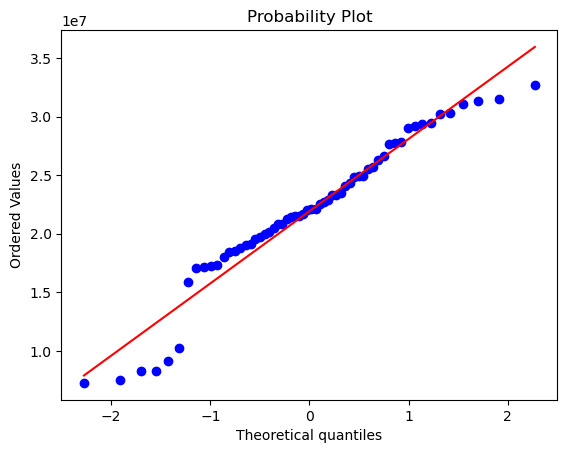

<Figure size 640x480 with 0 Axes>

In [93]:
#QQ-plot

stats.probplot(Anova_subset_1.value, plot = plt)
plt.figure();

Performing Shapiro Wilk test<br>
H:0 data comes from a normal distribution<br>
H1: data does not come fom a normal distribution

# Anova Step 2:

In [94]:
import scipy.stats as st

#Shapiro test Dublin Airport
st.shapiro(Anova_subset_1.value[Anova_subset_1.Country_Icao=='IE_EIDW'])

ShapiroResult(statistic=0.955747663974762, pvalue=0.4627649188041687)

In [95]:
#Shapiro test Zurich Airport
st.shapiro(Anova_subset_1.value[Anova_subset_1.Country_Icao=='CH_LSZH'])

ShapiroResult(statistic=0.9495340585708618, pvalue=0.36007261276245117)

In [96]:
#Shapiro test Copenhagen Airport
st.shapiro(Anova_subset_1.value[Anova_subset_1.Country_Icao=='DK_EKCH'])

ShapiroResult(statistic=0.9070241451263428, pvalue=0.055949851870536804)

Alpha is 5% pvalues are greater than alpha so we accept the null hipothesis H:0<br>
Then our data is normally distributed

Levene test to determine whether the variances are equal.<br>
Hypotheses:<br>
Null Hypothesis (H0): variances are equal across the airports.<br>
Alternative Hypothesis (H1): Variances are not equal across the airports

In [97]:
# Passing each airport into a variable to perform levene test
IE_EIDW = Anova_subset_1.value[Anova_subset_1.Country_Icao=='IE_EIDW']
CH_LSZH = Anova_subset_1.value[Anova_subset_1.Country_Icao=='CH_LSZH']
DK_EKCH = Anova_subset_1.value[Anova_subset_1.Country_Icao=='DK_EKCH']

# Anova Step 3:

In [98]:
from scipy.stats import levene

levene(IE_EIDW,CH_LSZH,DK_EKCH,center = 'mean')

LeveneResult(statistic=0.16345015829570614, pvalue=0.8496054262377076)

# Anova Step 4:

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#H0 : mu IE_EIDW = mu CH_LSZH = mu DK_EKCH
#H1 : there are at least 2 mu that are different one to another

#We work with ANOVA One Way --> We analyse the value for each airport

model = ols('value~Country_Icao', data=Anova_subset_1).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

                df        sum_sq       mean_sq         F    PR(>F)
Country_Icao   2.0  9.221536e+12  4.610768e+12  0.117038  0.889765
Residual      57.0  2.245547e+15  3.939555e+13       NaN       NaN


There is no reason to reject the Null Hypothesis; therefore we can state that with a 5% alpha <br>
the mean of annual passengers carried (2003-2022) for Dublin, Zurich and Copenhagen aiports is the same.

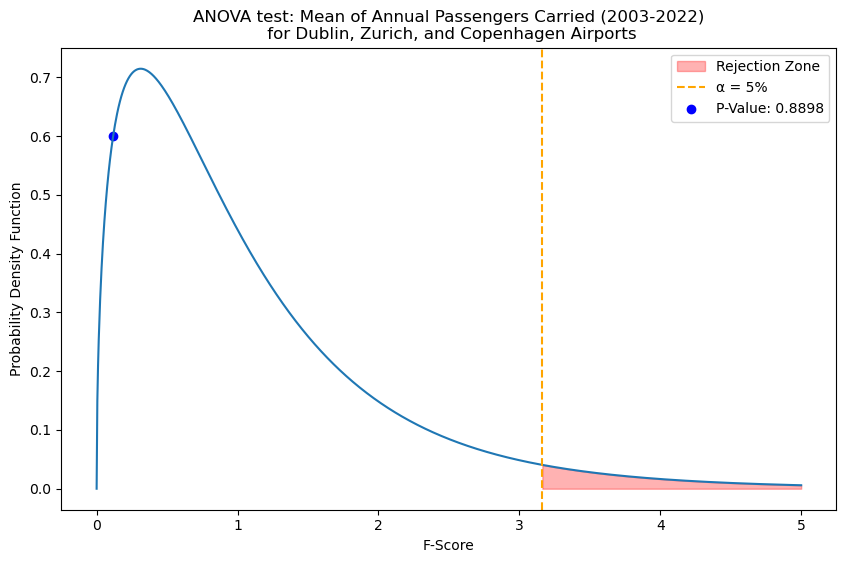

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

statistic = 0.117038
p_value = 0.889765
alpha = 0.05


df_between = 2  # Degrees of freedom between groups
df_within = 57   # Degrees of freedom within groups

plt.figure(figsize=(10, 6))

# Generating x values to plot the curve
x = np.linspace(0, 5, 1000)

# Calculating the F-distribution curve
y = f.pdf(x, df_between+1, df_within-27)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
critical_value = f.ppf(1 - 0.05, df_between, df_within)
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.3, label='Rejection Zone')

# Adding labels and title
plt.xlabel('F-Score')
plt.ylabel('Probability Density Function')
plt.title('ANOVA test: Mean of Annual Passengers Carried (2003-2022)\n for Dublin, Zurich, and Copenhagen Airports')

# Marking alpha value
plt.axvline(critical_value, color='orange', linestyle='--', label='α = 5%')

# Marking the test statistic over the F-distribution
plt.scatter([statistic], [f.pdf(statistic, df_between+1, df_within-27)], color='blue', label= f'P-Value: {p_value:.4f}')

# Adding p-value number
plt.text(statistic + 0.2, f.pdf(statistic, df_between+1, df_within-27), f'', color='black')

# Legend
plt.legend()

# Plotting
plt.show()

Now let's find another subset where Anova will reject the Null Hypothesis.

Dublin Airport is our choice as it is the main airport in Ireland, values:<br>
**mean:** 21390654.55<br>
**std:** 6668767.341634<br>
Now we will be opening the range of airports in terms of *mean* and *std*<br>
to reject the Null hypothesis.

In [101]:
# Filtering the 'mean' column
Anova_subset_2 = (sdf2b[(sdf2b['mean'] > 0) & (sdf2b['mean'] < 6000000) & (sdf2b['count'] == 20)]).sort_values(by='mean').reset_index()
Anova_subset_2 = Anova_subset_2.drop(['index'], axis=1)
pd.set_option('display.max_rows', None)  # To display all rows
Anova_subset_2

,Country_Icao,Airport_Name,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,CH_LSGS,Sion Airport,20.0,NaN,NaN,NaN,5785.4,4927.259796,1339.0,3581.75,4649.0,6401.25,24555.0
1,FI_EFSA,Savonlinna Airport,20.0,NaN,NaN,NaN,15274.25,9117.300708,613.0,10680.25,13459.0,19582.25,36606.0
2,FI_EFPO,Pori Airport,20.0,NaN,NaN,NaN,36342.05,23910.743389,4711.0,13727.75,30708.5,60840.0,70144.0
3,PT_LPFL,Flores Airport,20.0,NaN,NaN,NaN,38242.85,13617.792724,24103.0,31680.75,34895.0,42665.5,89333.0
4,FI_EFMA,Mariehamn Airport,20.0,NaN,NaN,NaN,51605.7,13134.503225,18305.0,51247.5,55183.0,59364.25,63732.0
5,CZ_LKKV,Karlovy Vary Airport,20.0,NaN,NaN,NaN,51664.25,31929.585525,587.0,25043.25,48362.0,73373.25,103720.0
6,DK_EKSB,Sonderborg Airport,20.0,NaN,NaN,NaN,56862.9,15052.609408,21894.0,50254.5,60480.5,67592.75,73611.0
7,FI_EFKE,Kemi-Tornio Airport,20.0,NaN,NaN,NaN,74775.65,30550.715334,14890.0,60348.75,78614.0,95667.5,119067.0
8,FI_EFKK,Kokkola-Pietarsaari Airport,20.0,NaN,NaN,NaN,78344.45,26061.885357,14952.0,77379.75,88339.5,94446.25,98517.0
9,FI_EFKI,Kajaani Airport,20.0,NaN,NaN,NaN,79065.3,28881.035018,17906.0,73946.0,84494.5,91819.25,125098.0


In [102]:
#Shapiro test Zurich Airport
st.shapiro(sdf2.value[sdf2.Country_Icao=='IE_EINN'])

ShapiroResult(statistic=0.9225929379463196, pvalue=0.11116039007902145)

In [103]:
#Shapiro test Zurich Airport
st.shapiro(sdf2.value[sdf2.Country_Icao=='IT_LIPH'])

ShapiroResult(statistic=0.9687676429748535, pvalue=0.7286636829376221)

In [104]:
#Shapiro test Zurich Airport
st.shapiro(sdf2.value[sdf2.Country_Icao=='DK_EKBI'])

ShapiroResult(statistic=0.9748784303665161, pvalue=0.8525817394256592)

In [105]:
# Passing each airport into a variable to perform levene test
IE_EINN = sdf2.value[sdf2.Country_Icao=='IE_EINN']
IT_LIPH = sdf2.value[sdf2.Country_Icao=='IT_LIPH']
DK_EKBI = sdf2.value[sdf2.Country_Icao=='DK_EKBI']

In [106]:
from scipy.stats import levene

levene(IE_EINN,IT_LIPH,DK_EKBI,center = 'mean')

LeveneResult(statistic=0.4666451274077554, pvalue=0.6294769685214043)

In [107]:
# Select subset of IE_EIDW, CH_LSZH and DK_EKCH
Anova_subset_2 = sdf2[sdf2['Country_Icao'].isin(['IE_EINN', 'IT_LIPH', 'DK_EKBI'])].reset_index()
Anova_subset_2 = Anova_subset_2.drop(['index'], axis=1)
Anova_subset_2

,Year,Country_Icao,Airport_Name,value
0,2003,DK_EKBI,Billund Airport,1549421.0
1,2003,IE_EINN,Shannon Airport,2481372.0
2,2003,IT_LIPH,Treviso-Sant'Angelo Airport,676771.0
3,2004,DK_EKBI,Billund Airport,1820723.0
4,2004,IE_EINN,Shannon Airport,2486478.0
5,2004,IT_LIPH,Treviso-Sant'Angelo Airport,884714.0
6,2005,DK_EKBI,Billund Airport,2013783.0
7,2005,IE_EINN,Shannon Airport,3268522.0
8,2005,IT_LIPH,Treviso-Sant'Angelo Airport,1288693.0
9,2006,DK_EKBI,Billund Airport,1868351.0


In [108]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#H0 : mu IE_EIDW = mu CH_LSZH = mu DK_EKCH
#H1 : there are at least 2 mu that are different one to another

#We work with ANOVA One Way --> We analyse the value for each airport

model = ols('value~Country_Icao', data=Anova_subset_2).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

                df        sum_sq       mean_sq         F    PR(>F)
Country_Icao   2.0  5.170656e+12  2.585328e+12  3.526837  0.035969
Residual      57.0  4.178353e+13  7.330444e+11       NaN       NaN


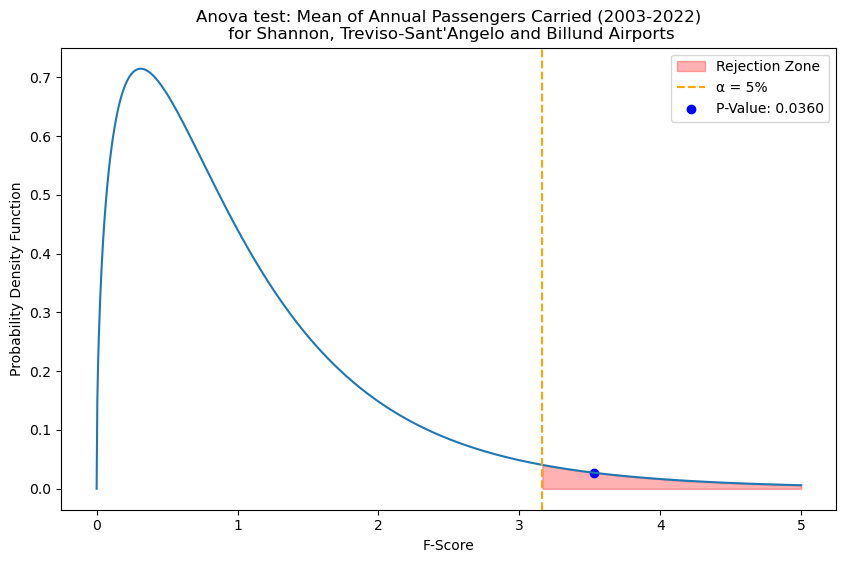

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

statistic = 3.526837  
p_value = 0.035969
alpha = 0.05


df_between = 2  # Degrees of freedom between groups
df_within = 57   # Degrees of freedom within groups

plt.figure(figsize=(10, 6))

# Generating x values to plot the curve
x = np.linspace(0, 5, 1000)

# Calculating the F-distribution curve
y = f.pdf(x, df_between+1, df_within-27)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
critical_value = f.ppf(1 - 0.05, df_between, df_within)
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.3, label='Rejection Zone')

# Adding labels and title
plt.xlabel('F-Score')
plt.ylabel('Probability Density Function')
plt.title('Anova test: Mean of Annual Passengers Carried (2003-2022)\n for Shannon, Treviso-Sant\'Angelo and Billund Airports')

# Marking alpha value
plt.axvline(critical_value, color='orange', linestyle='--', label='α = 5%')

# Marking the test statistic over the F-distribution
plt.scatter([statistic], [f.pdf(statistic, df_between+1, df_within-27)], color='blue', label= f'P-Value: {p_value:.4f}')

# Adding p-value number
plt.text(statistic + 0.2, f.pdf(statistic, df_between+1, df_within-27), f'', color='black')

# Legend
plt.legend()

# Plotting
plt.show()


# 3.3.1.3.	Chi-squared test	


In [311]:
sdf3.head()

,Vehicle_type,Country_code,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value
0,BUS,AT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.0,10.9,10.9,10.9,11.0,10.5,10.4,10.8,10.0,9.1,9.3,9.4,10.0,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0
1,BUS,BE,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,10.8,11.0,11.7,13.0,13.2,13.0,13.2,14.3,14.4,13.3,12.3,12.8,12.5,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2
3,BUS,CH,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,5.2,5.2,5.1,5.2,5.2,5.3,5.6,5.5,5.2,5.1,5.1,5.7,5.7,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9
6,BUS,DE,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,7.0,6.9,7.1,6.9,6.7,6.8,6.7,6.7,6.6,6.5,6.3,6.1,6.0,7.3,7.1,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8
7,BUS,DK,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,14.1,13.9,14.0,14.0,14.0,11.6,11.4,11.4,9.9,9.7,9.7,10.4,10.5,10.1,9.8,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1


In [312]:
import pandas as pd

def add_total_value_column(sdf3):
    # Selecting columns relevant to years (assuming they are named consistently)
    year_columns = [col for col in sdf3.columns if col.endswith('_value')]

    # Creating a new column 'Total_value' by summing values across all years
    sdf3['Total'] = sdf3[year_columns].sum(axis=1)

    return sdf3

# Example usage:
# Assuming df is your DataFrame
sdf3 = add_total_value_column(sdf3)
sdf3

,Vehicle_type,Country_code,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,Total
0,BUS,AT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.0,10.9,10.9,10.9,11.0,10.5,10.4,10.8,10.0,9.1,9.3,9.4,10.0,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0,328.8
1,BUS,BE,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,10.8,11.0,11.7,13.0,13.2,13.0,13.2,14.3,14.4,13.3,12.3,12.8,12.5,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2,371.3
3,BUS,CH,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,5.2,5.2,5.1,5.2,5.2,5.3,5.6,5.5,5.2,5.1,5.1,5.7,5.7,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9,163.0
6,BUS,DE,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,7.0,6.9,7.1,6.9,6.7,6.8,6.7,6.7,6.6,6.5,6.3,6.1,6.0,7.3,7.1,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8,224.0
7,BUS,DK,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,14.1,13.9,14.0,14.0,14.0,11.6,11.4,11.4,9.9,9.7,9.7,10.4,10.5,10.1,9.8,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1,375.7
9,BUS,EL,32.4,31.8,32.2,31.7,31.1,30.7,29.6,28.5,28.0,26.5,25.1,23.8,23.0,22.1,20.9,20.0,19.2,18.5,17.9,16.9,17.3,17.6,17.7,17.8,17.7,17.5,17.1,16.6,16.4,16.0,12.6,12.3,706.5
10,BUS,ES,14.9,13.7,13.2,13.2,13.0,13.0,23.3,22.5,12.8,12.9,13.5,13.7,12.3,11.8,13.2,12.9,12.0,14.0,14.3,13.3,12.3,13.5,13.7,13.2,10.6,11.9,11.8,7.8,8.0,8.2,6.4,7.3,408.2
13,BUS,FI,13.5,13.1,13.0,13.2,13.2,13.1,13.0,12.6,12.1,11.5,11.5,11.3,11.1,10.9,10.6,10.3,10.3,10.0,10.1,10.0,9.9,9.8,9.8,9.8,9.8,9.7,11.9,10.4,10.1,9.9,9.2,8.3,353.0
14,BUS,FR,6.0,6.1,5.8,5.8,5.7,5.6,5.6,5.5,5.4,5.2,5.3,4.9,5.0,5.0,5.1,5.2,5.3,5.5,5.7,5.2,5.2,5.3,5.4,6.2,6.3,6.3,6.4,6.4,6.5,6.4,5.2,4.9,179.4
16,BUS,HU,24.8,23.4,22.9,23.2,23.5,23.6,25.0,24.0,23.7,24.1,25.0,24.9,24.7,24.6,22.7,23.4,22.1,21.1,24.2,20.7,21.5,21.5,22.3,21.4,21.3,20.9,21.5,21.1,19.3,18.6,15.3,14.3,710.6


In [313]:
# Filter columns that do not contain '_flag'
sdf3 = sdf3.filter(regex='^(?!.*_value)')

In [314]:
sdf3

,Vehicle_type,Country_code,Total
0,BUS,AT,328.8
1,BUS,BE,371.3
3,BUS,CH,163.0
6,BUS,DE,224.0
7,BUS,DK,375.7
9,BUS,EL,706.5
10,BUS,ES,408.2
13,BUS,FI,353.0
14,BUS,FR,179.4
16,BUS,HU,710.6


In [329]:
# Select subset of IE_Diesel, FI_Diesel and NO_Diesel
sdf3a = sdf3[sdf3['Country_code'].isin(['IE', 'BE'])].reset_index()
sdf3a = sdf3a.drop(['index'], axis=1)

In [330]:
sdf3a

,Vehicle_type,Country_code,Total
0,BUS,BE,371.3
1,BUS,IE,449.1
2,CAR,BE,2614.4
3,CAR,IE,2651.2
4,TRN,BE,214.8
5,TRN,IE,99.8


In [331]:
# Crosstab
sdf3a = pd.crosstab(sdf3a['Vehicle_type'], sdf3a['Country_code'], values=sdf3a['Total'], aggfunc='sum', margins=False)

sdf3a

Country_code,BE,IE
Vehicle_type,,
BUS,371.3,449.1
CAR,2614.4,2651.2
TRN,214.8,99.8


In [332]:
stats.chi2_contingency(sdf3a)

Chi2ContingencyResult(statistic=49.67258262157907, pvalue=1.6358208252181098e-11, dof=2, expected_freq=array([[ 410.2256351 ,  410.1743649 ],
       [2632.96453457, 2632.63546543],
       [ 157.30983033,  157.29016967]]))

In [278]:
# New passenger cars by type of motor energy
# Unit of measure: Registrations percentage of new passenger cars by type of motor energy
# https://ec.europa.eu/eurostat/databrowser/view/ROAD_EQR_CARPDA__custom_2784054/bookmark/table?lang=en&bookmarkId=6fa608a8-450f-4e81-8e8e-33f57ab73bd3

sdf3 = eurostat.get_data_df('ROAD_EQR_CARPDA',True)                                                                 
sdf3.head()

,freq,unit,mot_nrg,geo\TIME_PERIOD,2013_value,2013_flag,2014_value,2014_flag,2015_value,2015_flag,2016_value,2016_flag,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag,2022_value,2022_flag
0,A,NR,ALT,AL,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,3757.0,,4935.0,,5703.0,,4114.0,
1,A,NR,ALT,AT,1285.0,,2074.0,,2389.0,,4317.0,,5868.0,,7406.0,,9841.0,,16393.0,,33466.0,,34242.0,
2,A,NR,ALT,BA,39.0,,46.0,,49.0,,141.0,,136.0,,41.0,,137.0,,73.0,,229.0,,300.0,
3,A,NR,ALT,BE,841.0,,2234.0,,2147.0,,4413.0,,5418.0,,7931.0,,12525.0,,18920.0,,25867.0,,40656.0,
4,A,NR,ALT,BG,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:,23.0,,NaN,:


In [279]:
#sdf3.to_csv('New_passenger_cars_by_type_of_motor_energy.csv', index=False)

In [280]:
# Tyding up sfd2
# Filter columns that do not contain '_flag'
sdf3 = sdf3.filter(regex='^(?!.*_flag)')
# Renaming columns
sdf3 = sdf3.rename(columns={'geo\\TIME_PERIOD': 'Country_code','mot_nrg':'Motor_energy_type'})
sdf3.head()

,freq,unit,Motor_energy_type,Country_code,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,A,NR,ALT,AL,NaN,NaN,NaN,NaN,NaN,NaN,3757.0,4935.0,5703.0,4114.0
1,A,NR,ALT,AT,1285.0,2074.0,2389.0,4317.0,5868.0,7406.0,9841.0,16393.0,33466.0,34242.0
2,A,NR,ALT,BA,39.0,46.0,49.0,141.0,136.0,41.0,137.0,73.0,229.0,300.0
3,A,NR,ALT,BE,841.0,2234.0,2147.0,4413.0,5418.0,7931.0,12525.0,18920.0,25867.0,40656.0
4,A,NR,ALT,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN


In [281]:
# Dropping not needed rows:
# From column 'Vehicle_type' we don't need 'TRN_BUS_TOT_AVD'
# From column 'Motor_energy_type' we only want 'ALT', 'DIE', 'ELC' and 'PET'
sdf3 = sdf3[sdf3['Motor_energy_type'].isin(['ALT', 'DIE', 'ELC', 'PET'])]

# Relabelling categories column Motor_energy_type
sdf3['Motor_energy_type'] = sdf3['Motor_energy_type'].replace({
    'ALT': 'Alternative',
    'DIE': 'Diesel',
    'ELC': 'Electric',
    'PET': 'Petroleum'
})

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
sdf3 = sdf3.drop(['freq', 'unit'], axis=1)

# Drop rows with null values
sdf3 = sdf3.dropna()

In [282]:
sdf3.head()

,Motor_energy_type,Country_code,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
1,Alternative,AT,1285.0,2074.0,2389.0,4317.0,5868.0,7406.0,9841.0,16393.0,33466.0,34242.0
2,Alternative,BA,39.0,46.0,49.0,141.0,136.0,41.0,137.0,73.0,229.0,300.0
3,Alternative,BE,841.0,2234.0,2147.0,4413.0,5418.0,7931.0,12525.0,18920.0,25867.0,40656.0
5,Alternative,CH,2272.0,3012.0,4993.0,4484.0,5704.0,6250.0,14482.0,20378.0,32410.0,40730.0
6,Alternative,CY,8.0,1.0,4.0,7.0,18.0,5.0,58.0,42.0,80.0,403.0


In [303]:
import pandas as pd
import statsmodels.api as sm


# Extracting features (independent variables)
X = sdf3[['2013_value', '2014_value', '2015_value', '2016_value', '2017_value', '2018_value', '2019_value', '2020_value', '2021_value', '2022_value']]
# Adding a constant for the intercept
X = sm.add_constant(X)

# Extracting target (dependent variable)
y = sdf3['2022_value']

# Performing linear regression
model = sm.OLS(y, X).fit()

# Getting the summary
summary = model.summary()

# Extracting p-value
p_value = summary.tables[1]['P>|t|']['const']

print(f'P-value for the Null Hypothesis: {p_value:.4f}')


TypeError: list indices must be integers or slices, not str

In [283]:
# import pandas as pd

# def add_total_value_column(sdf3):
#     # Selecting columns relevant to years (assuming they are named consistently)
#     year_columns = [col for col in sdf3.columns if col.endswith('_value')]

#     # Creating a new column 'Total_value' by summing values across all years
#     sdf3['Avg'] = sdf3[year_columns].mean(axis=1)

#     return sdf3

# # Example usage:
# # Assuming df is your DataFrame
# sdf3 = add_total_value_column(sdf3)
# sdf3

In [284]:
import pandas as pd

def calculate_average_for_years(sdf3):
    # Selecting columns relevant to years (assuming they are named consistently)
    year_columns = [col for col in sdf3.columns if col.endswith('_value')]

    # Calculate the average across the selected year columns
    sdf3['Average'] = sdf3[year_columns].mean(axis=1)

    return sdf3

# Example usage:
# Assuming df is your DataFrame
sdf3 = calculate_average_for_years(sdf3)
sdf3


,Motor_energy_type,Country_code,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value,Average
1,Alternative,AT,1285.0,2074.0,2389.0,4317.0,5868.0,7406.0,9841.0,16393.0,33466.0,34242.0,11728.1
2,Alternative,BA,39.0,46.0,49.0,141.0,136.0,41.0,137.0,73.0,229.0,300.0,119.1
3,Alternative,BE,841.0,2234.0,2147.0,4413.0,5418.0,7931.0,12525.0,18920.0,25867.0,40656.0,12095.2
5,Alternative,CH,2272.0,3012.0,4993.0,4484.0,5704.0,6250.0,14482.0,20378.0,32410.0,40730.0,13471.5
6,Alternative,CY,8.0,1.0,4.0,7.0,18.0,5.0,58.0,42.0,80.0,403.0,62.6
8,Alternative,DE,46534.0,50482.0,56202.0,65703.0,33326.0,51711.0,78487.0,208271.0,370529.0,488321.0,144956.6
9,Alternative,DK,549.0,1608.0,1315.0,1315.0,753.0,1557.0,5515.0,14263.0,24951.0,30805.0,8263.1
10,Alternative,EE,137.0,348.0,46.0,35.0,35.0,86.0,655.0,1008.0,953.0,978.0,428.1
12,Alternative,ES,2088.0,2589.0,5121.0,5522.0,12531.0,34090.0,42864.0,33560.0,40091.0,47636.0,22609.2
13,Alternative,FI,559.0,650.0,506.0,402.0,936.0,1937.0,4039.0,6086.0,11075.0,15153.0,4134.3


In [285]:
sdf3.to_csv('New_passenger_cars_by_type_of_motor_energy.csv', index=False)

In [264]:
# Filter columns that do not contain '_flag'
sdf3 = sdf3.filter(regex='^(?!.*_value)')

In [265]:
sdf3

,Motor_energy_type,Country_code,Average
1,Alternative,AT,11728.1
2,Alternative,BA,119.1
3,Alternative,BE,12095.2
5,Alternative,CH,13471.5
6,Alternative,CY,62.6
8,Alternative,DE,144956.6
9,Alternative,DK,8263.1
10,Alternative,EE,428.1
12,Alternative,ES,22609.2
13,Alternative,FI,4134.3


In [266]:
sdf3 = sdf3.pivot_table(index=['Motor_energy_type'], columns='Country_code', values='Average').reset_index()
sdf3 = sdf3.rename_axis(None, axis=1) # Index with no name as it should be Country_code

In [249]:
sdf3

,Motor_energy_type,AT,BA,BE,CH,CY,DE,DK,EE,ES,FI,FR,HR,HU,IE,IT,LI,LT,MD,MT,NL,NO,PL,RO,SE,SI,TR
0,Alternative,11728.1,119.1,12095.2,13471.5,62.6,144956.6,8263.1,428.1,22609.2,4134.3,77014.2,2121.7,1921.9,4308.6,177820.0,112.6,534.0,4590.0,240.5,33773.6,55864.8,92398.0,6854.0,26859.1,3672.1,21764.5
1,Diesel,140304.2,3900.8,218352.8,96545.5,3423.5,1191222.7,56222.6,6238.4,NaN,27907.6,829300.8,55980.3,30419.0,64562.5,756017.8,682.8,6644.3,15230.6,2562.0,59716.1,43707.6,410737.2,39497.0,138792.3,23558.5,316567.7
2,Electric,11237.3,9.2,9603.9,12659.7,62.2,118342.8,8225.6,223.3,NaN,3280.3,64423.0,353.4,1628.4,3583.3,NaN,108.3,372.1,162.8,226.4,31596.7,55647.7,5144.0,2318.7,21587.0,NaN,1452.9
3,Petroleum,146753.3,2745.9,260157.9,185261.9,7427.3,1785750.8,135069.2,16019.9,NaN,74698.1,994904.1,25615.1,74840.0,44696.7,695155.8,1028.6,14192.1,9443.5,5494.9,299367.9,61654.4,578362.7,61694.2,172221.4,33149.4,278659.3


In [267]:
# Drop columns with null values
sdf3 = sdf3.dropna(axis=1)

In [268]:
sdf3

,Motor_energy_type,AT,BA,BE,CH,CY,DE,DK,EE,FI,FR,HR,HU,IE,LI,LT,MD,MT,NL,NO,PL,RO,SE,TR
0,Alternative,11728.1,119.1,12095.2,13471.5,62.6,144956.6,8263.1,428.1,4134.3,77014.2,2121.7,1921.9,4308.6,112.6,534.0,4590.0,240.5,33773.6,55864.8,92398.0,6854.0,26859.1,21764.5
1,Diesel,140304.2,3900.8,218352.8,96545.5,3423.5,1191222.7,56222.6,6238.4,27907.6,829300.8,55980.3,30419.0,64562.5,682.8,6644.3,15230.6,2562.0,59716.1,43707.6,410737.2,39497.0,138792.3,316567.7
2,Electric,11237.3,9.2,9603.9,12659.7,62.2,118342.8,8225.6,223.3,3280.3,64423.0,353.4,1628.4,3583.3,108.3,372.1,162.8,226.4,31596.7,55647.7,5144.0,2318.7,21587.0,1452.9
3,Petroleum,146753.3,2745.9,260157.9,185261.9,7427.3,1785750.8,135069.2,16019.9,74698.1,994904.1,25615.1,74840.0,44696.7,1028.6,14192.1,9443.5,5494.9,299367.9,61654.4,578362.7,61694.2,172221.4,278659.3


Hypothesis:<br>
Null Hypothesis (H0): There is no significant difference between the observed and expected frequencies.
Ireland and Denmark are independent and there is no association or relationship between them.<br>
Alternative Hypothesis (H1): There is a significant difference between the observed and expected frequencies.
Ireland and Denmark are not independent and there is association or relationship between them.<br>

In [269]:
Chi_square_cont= sdf3[['Motor_energy_type', 'IE','FI']]

In [270]:
Chi_square_cont

,Motor_energy_type,IE,FI
0,Alternative,4308.6,4134.3
1,Diesel,64562.5,27907.6
2,Electric,3583.3,3280.3
3,Petroleum,44696.7,74698.1


In [271]:
# from scipy.stats import chi2_contingency

# # Two-way Chisquare test for the relationship between country and Motor_energy_type
# contingencyTable = pd.crosstab(Chi_square_cont['IE'],Chi_square_cont['NO'])
# print(contingencyTable)
# stat, p, dof, expected = chi2_contingency(contingencyTable)
# stat, p, dof, expected

In [293]:
from scipy.stats import chi2_contingency

# defining the table
data = [[559,650,506,402,936,1937,4039,6086,11075,15153], [640,1152,2212,3346,631,1252,3666,4075,9515,16597]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print(p)
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


0.0
Dependent (reject H0)


In [296]:
obs = np.array([[559,650,506,402,936,1937,4039,6086,11075,15153], [559,650,506,402,936,1937,4039,6086,11075,12197]])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(p)

2.4224386853253353e-40


Having α = 5% as a p-value = 21.33% we can accept the Null Hypothesis and state that there is no significant difference between the observed and expected frequencies, variables are independent. In other words there is no significant association between the registrations percentage of new passenger cars by type of motor energy for Ireland and Denmark (2013-2022).

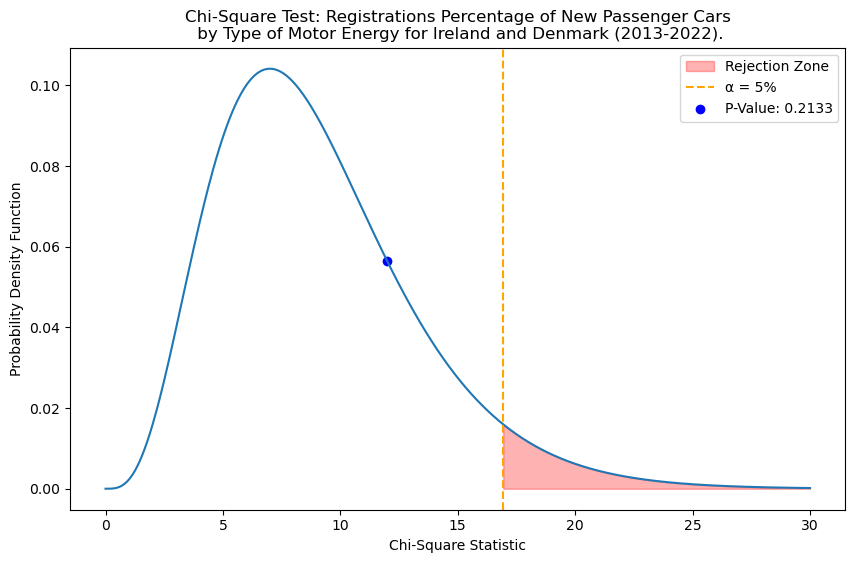

In [218]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Set the degrees of freedom for the chi-square distribution
df = 9

plt.figure(figsize=(10, 6))

# Generating x values to plot the curve
x = np.linspace(0, 30, 1000)

# Calculating the chi-square distribution curve
y = chi2.pdf(x, df)

# Plotting the curve
plt.plot(x, y)



# Creating the rejection zone (for illustration purposes)
critical_value = chi2.ppf(0.95, df)
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.3, label='Rejection Zone')

# Marking critical value
plt.axvline(critical_value, color='orange', linestyle='--', label='α = 5%')

# Highlighting the test statistics
p_value = 0.21330930508341653
test_statistics = [12.0]
plt.scatter(test_statistics, chi2.pdf(test_statistics, df), color='blue',  label= f'P-Value: {p_value:.4f}')

# Adding labels and title
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
plt.title(' Non-Symmetrical Bell Shape Example')
plt.title('Chi-Square Test: Registrations Percentage of New Passenger Cars\n by Type of Motor Energy for Ireland and Denmark (2013-2022).')

# Legend
plt.legend()

# Plotting
plt.show()

Let's find a scenario where there is a significant difference between the observed and expected frequencies and therefore, Null Hypothesis will be rejected.

In [219]:
sdf3

,Motor_energy_type,AT,BA,BE,CH,CY,DE,DK,EE,FI,FR,HR,HU,IE,LI,LT,MD,MT,NL,NO,PL,RO,SE,TR
0,Alternative,117281.0,1191.0,120952.0,134715.0,626.0,1449566.0,82631.0,4281.0,41343.0,770142.0,21217.0,19219.0,43086.0,1126.0,5340.0,45900.0,2405.0,337736.0,558648.0,923980.0,68540.0,268591.0,217645.0
1,Diesel,1403042.0,39008.0,2183528.0,965455.0,34235.0,11912227.0,562226.0,62384.0,279076.0,8293008.0,559803.0,304190.0,645625.0,6828.0,66443.0,152306.0,25620.0,597161.0,437076.0,4107372.0,394970.0,1387923.0,3165677.0
2,Electric,112373.0,92.0,96039.0,126597.0,622.0,1183428.0,82256.0,2233.0,32803.0,644230.0,3534.0,16284.0,35833.0,1083.0,3721.0,1628.0,2264.0,315967.0,556477.0,51440.0,23187.0,215870.0,14529.0
3,Petroleum,1467533.0,27459.0,2601579.0,1852619.0,74273.0,17857508.0,1350692.0,160199.0,746981.0,9949041.0,256151.0,748400.0,446967.0,10286.0,141921.0,94435.0,54949.0,2993679.0,616544.0,5783627.0,616942.0,1722214.0,2786593.0


In [223]:
Chi_square_cont_1= sdf3[['Motor_energy_type', 'IE','CY']]

In [224]:
Chi_square_cont_1

,Motor_energy_type,IE,CY
0,Alternative,43086.0,626.0
1,Diesel,645625.0,34235.0
2,Electric,35833.0,622.0
3,Petroleum,446967.0,74273.0


In [222]:
from scipy.stats import chi2_contingency

# Two-way Chisquare test for the relationship between country and Motor_energy_type
contingencyTable = pd.crosstab(Chi_square_cont_1['IE'],Chi_square_cont['CY'])
print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
stat, p, dof, expected

CY        622.0    626.0    34235.0  74273.0
IE                                          
35833.0         1        0        0        0
43086.0         0        1        0        0
446967.0        0        0        0        1
645625.0        0        0        1        0


(12.0,
 0.21330930508341653,
 9,
 array([[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]))

In [225]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame from your dataset
data = {
    'Motor_energy_type': ['Alternative', 'Diesel', 'Electric', 'Petroleum'],
    'IE': [43086.0, 645625.0, 35833.0, 446967.0],
    'CY': [626.0, 34235.0, 622.0, 74273.0]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Motor_energy_type'], columns=[df['IE'], df['CY']])

# Apply chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-squared statistic: 12.0
P-value: 0.21330930508341653
Degrees of freedom: 9
Expected frequencies:
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [228]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame from your dataset
data = {
    'Motor_energy_type': ['Alternative', 'Diesel', 'Electric', 'Petroleum'],
    'IE': [43086.0, 645625.0, 35833.0, 446967.0],
    'CY': [626.0, 34235.0, 622.0, 74273.0]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Motor_energy_type'], columns=[df['IE'], df['CY']])

# Flatten the contingency table
observed_values = contingency_table.values

# Apply chi-squared test
stat, p, dof, expected = chi2_contingency(observed_values, correction=False)

# Print the results
print("Chi-squared statistic:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-squared statistic: 12.0
P-value: 0.21330930508341653
Degrees of freedom: 9
Expected frequencies:
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [227]:
observed_values

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
#DK_Chi_square= sdf3[['Motor_energy_type', 'DK']]

In [ ]:
IE_Chi_square

In [ ]:
DK_Chi_square

In [ ]:
sdf3

In [ ]:
#QQ-plot

stats.probplot(sdf2.value, plot = plt)
plt.figure()

# Anova for Diesel

Now we will perform a Shapiro Wilk test<br><br>
Hypothesis:<br>
H0: data comes from a normal distribution<br>
H1: data does not come from a normal distribution

In [ ]:
#Shapiro test east
stats.shapiro(sdf2.value[sdf2.Country_motor_energy_type=='IE_Diesel'])

In [ ]:
#Shapiro test east
stats.shapiro(sdf2.value[sdf2.Country_motor_energy_type=='FI_Diesel'])

In [ ]:
#Shapiro test east
stats.shapiro(sdf2.value[sdf2.Country_motor_energy_type=='NO_Diesel'])

In [ ]:
IE_Diesel = sdf2.value[sdf2.Country_motor_energy_type=='IE_Diesel']
FI_Diesel = sdf2.value[sdf2.Country_motor_energy_type=='FI_Diesel']
NO_Diesel = sdf2.value[sdf2.Country_motor_energy_type=='NO_Diesel']

In [ ]:
#Homogeinity of the variances --> Levene test

#H0: the variances are equal
#H1: the variances are not equal

from scipy.stats import levene

levene(IE_Diesel,FI_Diesel,NO_Diesel,center = 'mean')

In [ ]:
# Select subset of IE_Diesel, FI_Diesel and NO_Diesel
sdf2a = sdf2[sdf2['Country_motor_energy_type'].isin(['IE_Diesel', 'FI_Diesel', 'NO_Diesel'])].reset_index()


In [ ]:
sdf2a

We set our hypothesis of **ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#H0 : mu east = mu south = mu north
#H1 : there are at least 2 mu that are different oen to another one

#We work with ANOVA One Way --> We analyse the charges based on one category (region)

model = ols('value~Country_motor_energy_type', data=sdf2a).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

Interpretation: we reject H0 as p-value is less than alpha.

# Petroleum

In [ ]:
#Shapiro test east
stats.shapiro(sdf2.value[sdf2.Country_motor_energy_type=='NO_Electric'])

In [ ]:
#Shapiro test east
stats.shapiro(sdf2.value[sdf2.Country_motor_energy_type=='FR_Electric'])

In [ ]:
#Shapiro test east
stats.shapiro(sdf2.value[sdf2.Country_motor_energy_type=='NL_Electric'])

In [ ]:
BA_Petroleum = sdf2.value[sdf2.Country_motor_energy_type=='BA_Petroleum']
CY_Petroleum = sdf2.value[sdf2.Country_motor_energy_type=='CY_Petroleum']
LI_Petroleum = sdf2.value[sdf2.Country_motor_energy_type=='LI_Petroleum']

In [ ]:
#Homogeinity of the variances --> Levene test

#H0: the variances are equal
#H1: the variances are not equal

from scipy.stats import levene

levene(BA_Petroleum,NO_Petroleum,LI_Petroleum,center = 'mean')

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Your dataset
data = {
    'Year': [2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016, 2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
    'Country_motor_energy_type': ['FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel'],
    'value': [38697.0, 54428.0, 83067.0, 41404.0, 61917.0, 76478.0, 38844.0, 92436.0, 76985.0, 39556.0, 105257.0, 53516.0, 36216.0, 87644.0, 44498.0, 29071.0, 70743.0, 34305.0, 22022.0, 59884.0, 28398.0, 14567.0, 41688.0, 19709.0, 11252.0, 40292.0, 11972.0, 7447.0, 31336.0, 8148.0]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Year'], df['Country_motor_energy_type'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Decide whether to reject the null hypothesis
alpha = 0.05  # Set the significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Year and Country for Diesel motor energy type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Year and Country for Diesel motor energy type.")


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Your dataset
data = {
    'Year': [2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016, 2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
    'Country_motor_energy_type': ['FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel', 'FI_Diesel', 'IE_Diesel', 'NO_Diesel'],
    'value': [38697.0, 54428.0, 83067.0, 41404.0, 61917.0, 76478.0, 38844.0, 92436.0, 76985.0, 39556.0, 105257.0, 53516.0, 36216.0, 87644.0, 44498.0, 29071.0, 70743.0, 34305.0, 22022.0, 59884.0, 28398.0, 14567.0, 41688.0, 19709.0, 11252.0, 40292.0, 11972.0, 7447.0, 31336.0, 8148.0]
}

df = pd.DataFrame(data)

# Filter the dataframe for the specific countries
selected_countries = ['FI_Diesel', 'IE_Diesel', 'NO_Diesel']
filtered_df = df[df['Country_motor_energy_type'].isin(selected_countries)]

# Create a contingency table
contingency_table = pd.crosstab(filtered_df['Year'], filtered_df['Country_motor_energy_type'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Decide whether to reject the null hypothesis
alpha = 0.05  # Set the significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the countries for the specified motor energy type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the countries for the specified motor energy type.")


In [ ]:
#sdf3 = eurostat.get_data_df('LFSO_19PLWK28',True)                                                                 


# 3.3.2.	Non-parametric
# 3.3.2.1.	Kruskal-Wallis



# 3.3.2.2.	U-Mann Whitman